In [1]:
from __future__ import print_function, division
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import data as dt
import model_4 as md
import copy
from pytorch_ssim import ssim
from torch.utils.data import DataLoader
# e/d + i + up

In [2]:
# print gpu
torch.cuda.set_device(6)
currentDevice = torch.cuda.current_device()
print("Current GPU: " + str(currentDevice))
print(str(torch.cuda.device_count()))
print(str(torch.cuda.get_device_capability(currentDevice)))
print(torch.__version__)

Current GPU: 6
8
(6, 1)
1.0.0


In [3]:
USE_GPU = 1
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:6')
else:
    device = "cpu"
print(device)

cuda:6


In [ ]:
# generate csv file, run only for the first time
# dt.generate_csv()

In [4]:
csvFilePath = dt.get_csv_path()
transformed_dataset = dt.HE_SHG_Dataset(csv_file=csvFilePath,
                                               transform=dt.Compose([                                              
                                               dt.Rescale(96),                                     
                                               dt.Normalize(),
                                               dt.ToTensor()
                                           ]))
# TODO: change the normalization parameters

In [5]:
# batchsize 32->16
dataloader = DataLoader(transformed_dataset, batch_size=32,
                        shuffle=True, num_workers=0)

In [ ]:
# TODO: insert back mean and variance to plot the image appropriately
dt.show_patch(dataloader) 

In [6]:
print('===> Building model')
model = md.Net().to(device)
criterionMSE = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)


===> Building model


In [7]:
def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        output = model(input)
        targetf = target.float()
        targetf = targetf[:, None]
        
        lossMSE = criterionMSE(output, targetf)      
        lossSSIM = -(ssim(output, targetf)-1)
        
        p = 0.75
        loss = p*lossMSE + (1-p)*lossSSIM
        combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
        
        epoch_loss = epoch_loss + combineLoss
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("lossMSE: " + str(lossMSE.item()) +
                  " " + "lossSSIM: " + str(lossSSIM.item()))
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))


In [ ]:
# def test():
#     avg_psnr = 0
#     with torch.no_grad():
#         for batch in testing_data_loader:
#             input, target = batch[0].to(device), batch[1].to(device)

#             prediction = model(input)
#             mse = criterion(prediction, target)
#             psnr = 10 * log10(1 / mse.item())
#             avg_psnr += psnr
#     print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))


In [ ]:
# def checkpoint(epoch):
#     model_out_path = "model_epoch_{}.pth".format(epoch)
#     torch.save(model, model_out_path)
#     print("Checkpoint saved to {}".format(model_out_path))

In [8]:
for epoch in range(1, 10 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)
#     wanna loss < 0.06

lossMSE: 0.257510781288147 lossSSIM: 0.974213182926178
===> Epoch[1](0/25343): Loss: 0.4367
lossMSE: 0.22467820346355438 lossSSIM: 0.9554298520088196
===> Epoch[1](50/25343): Loss: 0.4074
lossMSE: 0.22435900568962097 lossSSIM: 0.9483346343040466
===> Epoch[1](100/25343): Loss: 0.4054
lossMSE: 0.22294312715530396 lossSSIM: 0.9519307017326355
===> Epoch[1](150/25343): Loss: 0.4052
lossMSE: 0.21854645013809204 lossSSIM: 0.9476061463356018
===> Epoch[1](200/25343): Loss: 0.4008
lossMSE: 0.22295920550823212 lossSSIM: 0.9513169527053833
===> Epoch[1](250/25343): Loss: 0.4050
lossMSE: 0.2296634465456009 lossSSIM: 0.9584789276123047
===> Epoch[1](300/25343): Loss: 0.4119
lossMSE: 0.22208182513713837 lossSSIM: 0.9483994245529175
===> Epoch[1](350/25343): Loss: 0.4037
lossMSE: 0.2211720198392868 lossSSIM: 0.9518765807151794
===> Epoch[1](400/25343): Loss: 0.4038
lossMSE: 0.21857109665870667 lossSSIM: 0.954988420009613
===> Epoch[1](450/25343): Loss: 0.4027
lossMSE: 0.21024982631206512 lossSSIM: 

lossMSE: 0.14557772874832153 lossSSIM: 0.9334552884101868
===> Epoch[1](4250/25343): Loss: 0.3425
lossMSE: 0.15064267814159393 lossSSIM: 0.9507074952125549
===> Epoch[1](4300/25343): Loss: 0.3507
lossMSE: 0.14308620989322662 lossSSIM: 0.9336806535720825
===> Epoch[1](4350/25343): Loss: 0.3407
lossMSE: 0.13381056487560272 lossSSIM: 0.912666380405426
===> Epoch[1](4400/25343): Loss: 0.3285
lossMSE: 0.14503179490566254 lossSSIM: 0.9423224329948425
===> Epoch[1](4450/25343): Loss: 0.3444
lossMSE: 0.14548340439796448 lossSSIM: 0.9421865344047546
===> Epoch[1](4500/25343): Loss: 0.3447
lossMSE: 0.14226330816745758 lossSSIM: 0.939926266670227
===> Epoch[1](4550/25343): Loss: 0.3417
lossMSE: 0.14255136251449585 lossSSIM: 0.9382586479187012
===> Epoch[1](4600/25343): Loss: 0.3415
lossMSE: 0.13315711915493011 lossSSIM: 0.9231044054031372
===> Epoch[1](4650/25343): Loss: 0.3306
lossMSE: 0.13391193747520447 lossSSIM: 0.9288336038589478
===> Epoch[1](4700/25343): Loss: 0.3326
lossMSE: 0.13770638406

lossMSE: 0.08990904688835144 lossSSIM: 0.9275224208831787
===> Epoch[1](8450/25343): Loss: 0.2993
lossMSE: 0.08226514607667923 lossSSIM: 0.9023692607879639
===> Epoch[1](8500/25343): Loss: 0.2873
lossMSE: 0.08820901811122894 lossSSIM: 0.9228771924972534
===> Epoch[1](8550/25343): Loss: 0.2969
lossMSE: 0.08647548407316208 lossSSIM: 0.9174479246139526
===> Epoch[1](8600/25343): Loss: 0.2942
lossMSE: 0.08490481972694397 lossSSIM: 0.9184607863426208
===> Epoch[1](8650/25343): Loss: 0.2933
lossMSE: 0.08445879817008972 lossSSIM: 0.9234194755554199
===> Epoch[1](8700/25343): Loss: 0.2942
lossMSE: 0.08598333597183228 lossSSIM: 0.9257214069366455
===> Epoch[1](8750/25343): Loss: 0.2959
lossMSE: 0.08235544711351395 lossSSIM: 0.914383053779602
===> Epoch[1](8800/25343): Loss: 0.2904
lossMSE: 0.08026110380887985 lossSSIM: 0.9066331386566162
===> Epoch[1](8850/25343): Loss: 0.2869
lossMSE: 0.08387848734855652 lossSSIM: 0.9207484126091003
===> Epoch[1](8900/25343): Loss: 0.2931
lossMSE: 0.0795437991

lossMSE: 0.05037983879446983 lossSSIM: 0.8984870910644531
===> Epoch[1](12650/25343): Loss: 0.2624
lossMSE: 0.05056647211313248 lossSSIM: 0.9046555757522583
===> Epoch[1](12700/25343): Loss: 0.2641
lossMSE: 0.04708849638700485 lossSSIM: 0.8812409043312073
===> Epoch[1](12750/25343): Loss: 0.2556
lossMSE: 0.049934107810258865 lossSSIM: 0.9005227088928223
===> Epoch[1](12800/25343): Loss: 0.2626
lossMSE: 0.04900876432657242 lossSSIM: 0.9041290879249573
===> Epoch[1](12850/25343): Loss: 0.2628
lossMSE: 0.048598580062389374 lossSSIM: 0.8938947319984436
===> Epoch[1](12900/25343): Loss: 0.2599
lossMSE: 0.04780013859272003 lossSSIM: 0.8875126838684082
===> Epoch[1](12950/25343): Loss: 0.2577
lossMSE: 0.048368439078330994 lossSSIM: 0.8936895728111267
===> Epoch[1](13000/25343): Loss: 0.2597
lossMSE: 0.04742121696472168 lossSSIM: 0.8929160833358765
===> Epoch[1](13050/25343): Loss: 0.2588
lossMSE: 0.0480317622423172 lossSSIM: 0.905325174331665
===> Epoch[1](13100/25343): Loss: 0.2624
lossMSE: 

lossMSE: 0.028687499463558197 lossSSIM: 0.865081787109375
===> Epoch[1](16800/25343): Loss: 0.2378
lossMSE: 0.0296261515468359 lossSSIM: 0.8701324462890625
===> Epoch[1](16850/25343): Loss: 0.2398
lossMSE: 0.02840770035982132 lossSSIM: 0.8712279796600342
===> Epoch[1](16900/25343): Loss: 0.2391
lossMSE: 0.029607508331537247 lossSSIM: 0.8797971606254578
===> Epoch[1](16950/25343): Loss: 0.2422
lossMSE: 0.029842667281627655 lossSSIM: 0.8748744130134583
===> Epoch[1](17000/25343): Loss: 0.2411
lossMSE: 0.028645038604736328 lossSSIM: 0.8597215414047241
===> Epoch[1](17050/25343): Loss: 0.2364
lossMSE: 0.02703441120684147 lossSSIM: 0.8440109491348267
===> Epoch[1](17100/25343): Loss: 0.2313
lossMSE: 0.02609025500714779 lossSSIM: 0.8429989814758301
===> Epoch[1](17150/25343): Loss: 0.2303
lossMSE: 0.028664473444223404 lossSSIM: 0.8610929250717163
===> Epoch[1](17200/25343): Loss: 0.2368
lossMSE: 0.02873387560248375 lossSSIM: 0.8694311380386353
===> Epoch[1](17250/25343): Loss: 0.2389
lossMSE

lossMSE: 0.01737326942384243 lossSSIM: 0.8023542761802673
===> Epoch[1](20950/25343): Loss: 0.2136
lossMSE: 0.018085472285747528 lossSSIM: 0.8023661375045776
===> Epoch[1](21000/25343): Loss: 0.2142
lossMSE: 0.017381737008690834 lossSSIM: 0.7880238890647888
===> Epoch[1](21050/25343): Loss: 0.2100
lossMSE: 0.017405467107892036 lossSSIM: 0.8118420839309692
===> Epoch[1](21100/25343): Loss: 0.2160
lossMSE: 0.017544232308864594 lossSSIM: 0.7929173707962036
===> Epoch[1](21150/25343): Loss: 0.2114
lossMSE: 0.01647852174937725 lossSSIM: 0.786015510559082
===> Epoch[1](21200/25343): Loss: 0.2089
lossMSE: 0.018581394106149673 lossSSIM: 0.8156617283821106
===> Epoch[1](21250/25343): Loss: 0.2179
lossMSE: 0.01861276477575302 lossSSIM: 0.7628177404403687
===> Epoch[1](21300/25343): Loss: 0.2047
lossMSE: 0.023137463256716728 lossSSIM: 0.7932665944099426
===> Epoch[1](21350/25343): Loss: 0.2157
lossMSE: 0.01690499484539032 lossSSIM: 0.7852949500083923
===> Epoch[1](21400/25343): Loss: 0.2090
lossM

lossMSE: 0.014604819938540459 lossSSIM: 0.6892056465148926
===> Epoch[1](25100/25343): Loss: 0.1833
lossMSE: 0.01667010970413685 lossSSIM: 0.7165272235870361
===> Epoch[1](25150/25343): Loss: 0.1916
lossMSE: 0.016094569116830826 lossSSIM: 0.6752055883407593
===> Epoch[1](25200/25343): Loss: 0.1809
lossMSE: 0.016008734703063965 lossSSIM: 0.6865304708480835
===> Epoch[1](25250/25343): Loss: 0.1836
lossMSE: 0.018644213676452637 lossSSIM: 0.6760841608047485
===> Epoch[1](25300/25343): Loss: 0.1830
===> Epoch 1 Complete: Avg. Loss: 0.2748
lossMSE: 0.014173186384141445 lossSSIM: 0.7099859714508057
===> Epoch[2](0/25343): Loss: 0.1881
lossMSE: 0.016378363594412804 lossSSIM: 0.6569132804870605
===> Epoch[2](50/25343): Loss: 0.1765
lossMSE: 0.01596096158027649 lossSSIM: 0.6836549639701843
===> Epoch[2](100/25343): Loss: 0.1829
lossMSE: 0.013051336631178856 lossSSIM: 0.691425085067749
===> Epoch[2](150/25343): Loss: 0.1826
lossMSE: 0.013448424637317657 lossSSIM: 0.685547947883606
===> Epoch[2](2

lossMSE: 0.014013250358402729 lossSSIM: 0.5451797246932983
===> Epoch[2](3900/25343): Loss: 0.1468
lossMSE: 0.01380410697311163 lossSSIM: 0.5698050260543823
===> Epoch[2](3950/25343): Loss: 0.1528
lossMSE: 0.012950518168509007 lossSSIM: 0.5540190935134888
===> Epoch[2](4000/25343): Loss: 0.1482
lossMSE: 0.014465740881860256 lossSSIM: 0.5646224021911621
===> Epoch[2](4050/25343): Loss: 0.1520
lossMSE: 0.013747867196798325 lossSSIM: 0.5363041758537292
===> Epoch[2](4100/25343): Loss: 0.1444
lossMSE: 0.014837907627224922 lossSSIM: 0.5630749464035034
===> Epoch[2](4150/25343): Loss: 0.1519
lossMSE: 0.013588718138635159 lossSSIM: 0.5253045558929443
===> Epoch[2](4200/25343): Loss: 0.1415
lossMSE: 0.0164911150932312 lossSSIM: 0.5420103073120117
===> Epoch[2](4250/25343): Loss: 0.1479
lossMSE: 0.0172710083425045 lossSSIM: 0.5374320149421692
===> Epoch[2](4300/25343): Loss: 0.1473
lossMSE: 0.014524970203638077 lossSSIM: 0.5795555114746094
===> Epoch[2](4350/25343): Loss: 0.1558
lossMSE: 0.0122

lossMSE: 0.012282650917768478 lossSSIM: 0.438448965549469
===> Epoch[2](8050/25343): Loss: 0.1188
lossMSE: 0.012787897139787674 lossSSIM: 0.4765903949737549
===> Epoch[2](8100/25343): Loss: 0.1287
lossMSE: 0.01686498522758484 lossSSIM: 0.4750516414642334
===> Epoch[2](8150/25343): Loss: 0.1314
lossMSE: 0.01249187346547842 lossSSIM: 0.4603830575942993
===> Epoch[2](8200/25343): Loss: 0.1245
lossMSE: 0.011730530299246311 lossSSIM: 0.4482613801956177
===> Epoch[2](8250/25343): Loss: 0.1209
lossMSE: 0.017757587134838104 lossSSIM: 0.45350807905197144
===> Epoch[2](8300/25343): Loss: 0.1267
lossMSE: 0.011804274283349514 lossSSIM: 0.4698442816734314
===> Epoch[2](8350/25343): Loss: 0.1263
lossMSE: 0.014129082672297955 lossSSIM: 0.4537167549133301
===> Epoch[2](8400/25343): Loss: 0.1240
lossMSE: 0.012684978544712067 lossSSIM: 0.4720578193664551
===> Epoch[2](8450/25343): Loss: 0.1275
lossMSE: 0.01887454278767109 lossSSIM: 0.44573187828063965
===> Epoch[2](8500/25343): Loss: 0.1256
lossMSE: 0.0

lossMSE: 0.006697370670735836 lossSSIM: 0.3612215518951416
===> Epoch[2](12200/25343): Loss: 0.0953
lossMSE: 0.010113069787621498 lossSSIM: 0.3682336211204529
===> Epoch[2](12250/25343): Loss: 0.0996
lossMSE: 0.015339475125074387 lossSSIM: 0.403206467628479
===> Epoch[2](12300/25343): Loss: 0.1123
lossMSE: 0.008091840893030167 lossSSIM: 0.34060347080230713
===> Epoch[2](12350/25343): Loss: 0.0912
lossMSE: 0.009809421375393867 lossSSIM: 0.3875066637992859
===> Epoch[2](12400/25343): Loss: 0.1042
lossMSE: 0.009726323187351227 lossSSIM: 0.3537548780441284
===> Epoch[2](12450/25343): Loss: 0.0957
lossMSE: 0.009030739776790142 lossSSIM: 0.3885171413421631
===> Epoch[2](12500/25343): Loss: 0.1039
lossMSE: 0.007558750454336405 lossSSIM: 0.3771558403968811
===> Epoch[2](12550/25343): Loss: 0.1000
lossMSE: 0.011860024183988571 lossSSIM: 0.39343923330307007
===> Epoch[2](12600/25343): Loss: 0.1073
lossMSE: 0.011007710359990597 lossSSIM: 0.3541327714920044
===> Epoch[2](12650/25343): Loss: 0.0968

lossMSE: 0.00401780242100358 lossSSIM: 0.33447128534317017
===> Epoch[2](16300/25343): Loss: 0.0866
lossMSE: 0.008752744644880295 lossSSIM: 0.3319716453552246
===> Epoch[2](16350/25343): Loss: 0.0896
lossMSE: 0.012289045378565788 lossSSIM: 0.3367941379547119
===> Epoch[2](16400/25343): Loss: 0.0934
lossMSE: 0.0070583936758339405 lossSSIM: 0.3122689723968506
===> Epoch[2](16450/25343): Loss: 0.0834
lossMSE: 0.013435307890176773 lossSSIM: 0.33727192878723145
===> Epoch[2](16500/25343): Loss: 0.0944
lossMSE: 0.0034603651147335768 lossSSIM: 0.28243643045425415
===> Epoch[2](16550/25343): Loss: 0.0732
lossMSE: 0.014648248441517353 lossSSIM: 0.40062063932418823
===> Epoch[2](16600/25343): Loss: 0.1111
lossMSE: 0.006693067029118538 lossSSIM: 0.3493500351905823
===> Epoch[2](16650/25343): Loss: 0.0924
lossMSE: 0.007817242294549942 lossSSIM: 0.3285815119743347
===> Epoch[2](16700/25343): Loss: 0.0880


KeyboardInterrupt: 

In [15]:
import matplotlib.pyplot as plt
from torchvision import transforms, utils
def test():
    avg_psnr = 0
    with torch.no_grad():
        for iteration, batch in enumerate(dataloader):
            input, target = batch['input'].to(device), batch['output'].to(device)
                
            prediction = model(input)

            target = target.float()

            outdataloader = {'input':prediction,'output':target}
            
            print(outdataloader['input'].size(), 
                      outdataloader['output'].size())

            plt.figure()
            input_batch, label_batch = outdataloader['input'], outdataloader['output']
            batch_size = 32
            im_size = input_batch.size(2)
            label_batch=label_batch.reshape([batch_size,1,im_size,im_size])
            print(label_batch.size())
#             for img in input_batch:
#                 for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
#                     t.mul_(s).add_(m)
                            
#             for img in label_batch:
#                 for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
#                     t.mul_(s).add_(m)                           

            grid = utils.make_grid(input_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
            plt.figure()

            grid = utils.make_grid(label_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))

            plt.axis('off')
            plt.ioff()
            plt.show()
            
            targetf = target[:, None]
            
            lossMSE = criterionMSE(prediction, targetf)      
            lossSSIM = -ssim(prediction, targetf)
        
            p = 0.25
            loss = p*lossMSE + (1-p)*lossSSIM
            combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
#             mse = criterion(prediction, target.float())

            psnr = 10 * torch.log10(1 / loss)
            avg_psnr += psnr
            if iteration == 16:
                break
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(dataloader)))

In [ ]:
test()

In [ ]:
# restart
for epoch in range(1, 5 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

In [10]:
def train(epoch, p, windowsize):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        output = model(input)
        targetf = target.float()
        targetf = targetf[:, None]
        
        lossMSE = criterionMSE(output, targetf)      
        lossSSIM = 1-ssim(output, targetf, window_size=windowsize)
        
        # 0.75->0.4 after 3 epochs
        loss = p*lossMSE + (1-p)*lossSSIM
        combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
        
        epoch_loss = epoch_loss + combineLoss
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("lossMSE: " + str(lossMSE.item()) +
                  " " + "lossSSIM: " + str(lossSSIM.item()))
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))

In [11]:
l = 0.0001
p = 0
windowsize = 4
for epoch in range(1, 20 + 1):
    if epoch%5 == 0:
        windowsize = windowsize+1
        p = p*1
        l = l*0.2
        if windowsize == 0:
            windowsze = 1
    optimizer = optim.Adam(model.parameters(), lr=l)
        
    train(epoch, p, windowsize)

lossMSE: 0.006996138021349907 lossSSIM: 0.34353458881378174
===> Epoch[1](0/25343): Loss: 0.3435
lossMSE: 0.0035437080077826977 lossSSIM: 0.3383822441101074
===> Epoch[1](50/25343): Loss: 0.3384
lossMSE: 0.005230362992733717 lossSSIM: 0.33881402015686035
===> Epoch[1](100/25343): Loss: 0.3388
lossMSE: 0.0065048751421272755 lossSSIM: 0.34571373462677
===> Epoch[1](150/25343): Loss: 0.3457
lossMSE: 0.005852372385561466 lossSSIM: 0.3129233121871948
===> Epoch[1](200/25343): Loss: 0.3129
lossMSE: 0.00902379211038351 lossSSIM: 0.35028302669525146
===> Epoch[1](250/25343): Loss: 0.3503
lossMSE: 0.00847490131855011 lossSSIM: 0.33797991275787354
===> Epoch[1](300/25343): Loss: 0.3380
lossMSE: 0.006889975629746914 lossSSIM: 0.3429279327392578
===> Epoch[1](350/25343): Loss: 0.3429
lossMSE: 0.016553329303860664 lossSSIM: 0.33446818590164185
===> Epoch[1](400/25343): Loss: 0.3345
lossMSE: 0.008084922097623348 lossSSIM: 0.29520106315612793
===> Epoch[1](450/25343): Loss: 0.2952
lossMSE: 0.00639685

lossMSE: 0.005720946937799454 lossSSIM: 0.31329047679901123
===> Epoch[1](4150/25343): Loss: 0.3133
lossMSE: 0.006333641707897186 lossSSIM: 0.27944743633270264
===> Epoch[1](4200/25343): Loss: 0.2794
lossMSE: 0.009462114423513412 lossSSIM: 0.31993943452835083
===> Epoch[1](4250/25343): Loss: 0.3199
lossMSE: 0.004406026564538479 lossSSIM: 0.29736000299453735
===> Epoch[1](4300/25343): Loss: 0.2974
lossMSE: 0.006743097677826881 lossSSIM: 0.29120635986328125
===> Epoch[1](4350/25343): Loss: 0.2912
lossMSE: 0.0061157396994531155 lossSSIM: 0.2786518335342407
===> Epoch[1](4400/25343): Loss: 0.2787
lossMSE: 0.005345531739294529 lossSSIM: 0.29867660999298096
===> Epoch[1](4450/25343): Loss: 0.2987
lossMSE: 0.00862218253314495 lossSSIM: 0.30137938261032104
===> Epoch[1](4500/25343): Loss: 0.3014
lossMSE: 0.006750968750566244 lossSSIM: 0.32318317890167236
===> Epoch[1](4550/25343): Loss: 0.3232
lossMSE: 0.009512131102383137 lossSSIM: 0.31996339559555054
===> Epoch[1](4600/25343): Loss: 0.3200
l

lossMSE: 0.01385992020368576 lossSSIM: 0.30841493606567383
===> Epoch[1](8300/25343): Loss: 0.3084
lossMSE: 0.008807392790913582 lossSSIM: 0.28661447763442993
===> Epoch[1](8350/25343): Loss: 0.2866
lossMSE: 0.011029642075300217 lossSSIM: 0.28498220443725586
===> Epoch[1](8400/25343): Loss: 0.2850
lossMSE: 0.01054100040346384 lossSSIM: 0.27841103076934814
===> Epoch[1](8450/25343): Loss: 0.2784
lossMSE: 0.022364668548107147 lossSSIM: 0.35585683584213257
===> Epoch[1](8500/25343): Loss: 0.3559
lossMSE: 0.016082249581813812 lossSSIM: 0.32499581575393677
===> Epoch[1](8550/25343): Loss: 0.3250
lossMSE: 0.009549826383590698 lossSSIM: 0.3067830204963684
===> Epoch[1](8600/25343): Loss: 0.3068
lossMSE: 0.013425536453723907 lossSSIM: 0.30864691734313965
===> Epoch[1](8650/25343): Loss: 0.3086
lossMSE: 0.012809328734874725 lossSSIM: 0.3050996661186218
===> Epoch[1](8700/25343): Loss: 0.3051
lossMSE: 0.016763469204306602 lossSSIM: 0.3113775849342346
===> Epoch[1](8750/25343): Loss: 0.3114
lossM

lossMSE: 0.009149076417088509 lossSSIM: 0.2832818627357483
===> Epoch[1](12450/25343): Loss: 0.2833
lossMSE: 0.013565373606979847 lossSSIM: 0.2890843152999878
===> Epoch[1](12500/25343): Loss: 0.2891
lossMSE: 0.012466657906770706 lossSSIM: 0.29401224851608276
===> Epoch[1](12550/25343): Loss: 0.2940
lossMSE: 0.012211994268000126 lossSSIM: 0.30763453245162964
===> Epoch[1](12600/25343): Loss: 0.3076
lossMSE: 0.019737839698791504 lossSSIM: 0.3094859719276428
===> Epoch[1](12650/25343): Loss: 0.3095
lossMSE: 0.015035990625619888 lossSSIM: 0.32111865282058716
===> Epoch[1](12700/25343): Loss: 0.3211
lossMSE: 0.010142306797206402 lossSSIM: 0.2709483504295349
===> Epoch[1](12750/25343): Loss: 0.2709
lossMSE: 0.011643309146165848 lossSSIM: 0.2921063303947449
===> Epoch[1](12800/25343): Loss: 0.2921
lossMSE: 0.013892359100282192 lossSSIM: 0.29252439737319946
===> Epoch[1](12850/25343): Loss: 0.2925
lossMSE: 0.010363736189901829 lossSSIM: 0.3112940192222595
===> Epoch[1](12900/25343): Loss: 0.3

lossMSE: 0.012428302317857742 lossSSIM: 0.2874920964241028
===> Epoch[1](16550/25343): Loss: 0.2875
lossMSE: 0.009322798810899258 lossSSIM: 0.2700825333595276
===> Epoch[1](16600/25343): Loss: 0.2701
lossMSE: 0.011572682298719883 lossSSIM: 0.2638641595840454
===> Epoch[1](16650/25343): Loss: 0.2639
lossMSE: 0.01928662322461605 lossSSIM: 0.26631003618240356
===> Epoch[1](16700/25343): Loss: 0.2663
lossMSE: 0.016177259385585785 lossSSIM: 0.3167310357093811
===> Epoch[1](16750/25343): Loss: 0.3167
lossMSE: 0.016652792692184448 lossSSIM: 0.28544026613235474
===> Epoch[1](16800/25343): Loss: 0.2854
lossMSE: 0.010245734825730324 lossSSIM: 0.29933297634124756
===> Epoch[1](16850/25343): Loss: 0.2993
lossMSE: 0.008426062762737274 lossSSIM: 0.3382439613342285
===> Epoch[1](16900/25343): Loss: 0.3382
lossMSE: 0.01888001710176468 lossSSIM: 0.2880871891975403
===> Epoch[1](16950/25343): Loss: 0.2881
lossMSE: 0.008551002480089664 lossSSIM: 0.26967674493789673
===> Epoch[1](17000/25343): Loss: 0.269

lossMSE: 0.01194055750966072 lossSSIM: 0.29894018173217773
===> Epoch[1](20650/25343): Loss: 0.2989
lossMSE: 0.011018218472599983 lossSSIM: 0.25902146100997925
===> Epoch[1](20700/25343): Loss: 0.2590
lossMSE: 0.012027788907289505 lossSSIM: 0.2940683960914612
===> Epoch[1](20750/25343): Loss: 0.2941
lossMSE: 0.02374052256345749 lossSSIM: 0.3432353138923645
===> Epoch[1](20800/25343): Loss: 0.3432
lossMSE: 0.01645849458873272 lossSSIM: 0.2714465856552124
===> Epoch[1](20850/25343): Loss: 0.2714
lossMSE: 0.010317487642168999 lossSSIM: 0.28109079599380493
===> Epoch[1](20900/25343): Loss: 0.2811
lossMSE: 0.01701759546995163 lossSSIM: 0.3393002152442932
===> Epoch[1](20950/25343): Loss: 0.3393
lossMSE: 0.009520106948912144 lossSSIM: 0.2568473815917969
===> Epoch[1](21000/25343): Loss: 0.2568
lossMSE: 0.013912755995988846 lossSSIM: 0.2734959125518799
===> Epoch[1](21050/25343): Loss: 0.2735
lossMSE: 0.0070564765483140945 lossSSIM: 0.25065916776657104
===> Epoch[1](21100/25343): Loss: 0.2507

lossMSE: 0.015403445810079575 lossSSIM: 0.2751564383506775
===> Epoch[1](24750/25343): Loss: 0.2752
lossMSE: 0.01536568533629179 lossSSIM: 0.33251309394836426
===> Epoch[1](24800/25343): Loss: 0.3325
lossMSE: 0.013919619843363762 lossSSIM: 0.29870927333831787
===> Epoch[1](24850/25343): Loss: 0.2987
lossMSE: 0.0202956423163414 lossSSIM: 0.34862595796585083
===> Epoch[1](24900/25343): Loss: 0.3486
lossMSE: 0.009069297462701797 lossSSIM: 0.26548075675964355
===> Epoch[1](24950/25343): Loss: 0.2655
lossMSE: 0.013273213058710098 lossSSIM: 0.30482780933380127
===> Epoch[1](25000/25343): Loss: 0.3048
lossMSE: 0.014888595789670944 lossSSIM: 0.2816653847694397
===> Epoch[1](25050/25343): Loss: 0.2817
lossMSE: 0.012221841141581535 lossSSIM: 0.2918039560317993
===> Epoch[1](25100/25343): Loss: 0.2918
lossMSE: 0.015647022053599358 lossSSIM: 0.3021138310432434
===> Epoch[1](25150/25343): Loss: 0.3021
lossMSE: 0.011462364345788956 lossSSIM: 0.3174431324005127
===> Epoch[1](25200/25343): Loss: 0.317

lossMSE: 0.00850718654692173 lossSSIM: 0.269996702671051
===> Epoch[2](3550/25343): Loss: 0.2700
lossMSE: 0.019846059381961823 lossSSIM: 0.2929133176803589
===> Epoch[2](3600/25343): Loss: 0.2929
lossMSE: 0.013806200586259365 lossSSIM: 0.26218461990356445
===> Epoch[2](3650/25343): Loss: 0.2622
lossMSE: 0.014671651646494865 lossSSIM: 0.31553226709365845
===> Epoch[2](3700/25343): Loss: 0.3155
lossMSE: 0.007618608418852091 lossSSIM: 0.26019686460494995
===> Epoch[2](3750/25343): Loss: 0.2602
lossMSE: 0.006845565512776375 lossSSIM: 0.2954910397529602
===> Epoch[2](3800/25343): Loss: 0.2955
lossMSE: 0.01401310320943594 lossSSIM: 0.27870601415634155
===> Epoch[2](3850/25343): Loss: 0.2787
lossMSE: 0.013463480398058891 lossSSIM: 0.267742395401001
===> Epoch[2](3900/25343): Loss: 0.2677
lossMSE: 0.013959109783172607 lossSSIM: 0.29259878396987915
===> Epoch[2](3950/25343): Loss: 0.2926
lossMSE: 0.014094357378780842 lossSSIM: 0.28640615940093994
===> Epoch[2](4000/25343): Loss: 0.2864
lossMSE:

lossMSE: 0.009790720418095589 lossSSIM: 0.25108957290649414
===> Epoch[2](7700/25343): Loss: 0.2511
lossMSE: 0.01290847733616829 lossSSIM: 0.2805050015449524
===> Epoch[2](7750/25343): Loss: 0.2805
lossMSE: 0.014220942743122578 lossSSIM: 0.27815908193588257
===> Epoch[2](7800/25343): Loss: 0.2782
lossMSE: 0.014616088941693306 lossSSIM: 0.27391207218170166
===> Epoch[2](7850/25343): Loss: 0.2739
lossMSE: 0.013343408703804016 lossSSIM: 0.2801896333694458
===> Epoch[2](7900/25343): Loss: 0.2802
lossMSE: 0.015420662239193916 lossSSIM: 0.2631523013114929
===> Epoch[2](7950/25343): Loss: 0.2632
lossMSE: 0.011173789389431477 lossSSIM: 0.26266688108444214
===> Epoch[2](8000/25343): Loss: 0.2627
lossMSE: 0.012202284298837185 lossSSIM: 0.28873884677886963
===> Epoch[2](8050/25343): Loss: 0.2887
lossMSE: 0.008098374120891094 lossSSIM: 0.23816734552383423
===> Epoch[2](8100/25343): Loss: 0.2382
lossMSE: 0.016557717695832253 lossSSIM: 0.27414029836654663
===> Epoch[2](8150/25343): Loss: 0.2741
loss

lossMSE: 0.011570318602025509 lossSSIM: 0.2871086001396179
===> Epoch[2](11850/25343): Loss: 0.2871
lossMSE: 0.010754804126918316 lossSSIM: 0.24818217754364014
===> Epoch[2](11900/25343): Loss: 0.2482
lossMSE: 0.01245981827378273 lossSSIM: 0.2588350176811218
===> Epoch[2](11950/25343): Loss: 0.2588
lossMSE: 0.00971202552318573 lossSSIM: 0.2365395426750183
===> Epoch[2](12000/25343): Loss: 0.2365
lossMSE: 0.0095338961109519 lossSSIM: 0.2847750782966614
===> Epoch[2](12050/25343): Loss: 0.2848
lossMSE: 0.012326594442129135 lossSSIM: 0.23341017961502075
===> Epoch[2](12100/25343): Loss: 0.2334
lossMSE: 0.01616048999130726 lossSSIM: 0.24783414602279663
===> Epoch[2](12150/25343): Loss: 0.2478
lossMSE: 0.013619590550661087 lossSSIM: 0.27215200662612915
===> Epoch[2](12200/25343): Loss: 0.2722
lossMSE: 0.007925929501652718 lossSSIM: 0.272835910320282
===> Epoch[2](12250/25343): Loss: 0.2728
lossMSE: 0.009877964854240417 lossSSIM: 0.2705214023590088
===> Epoch[2](12300/25343): Loss: 0.2705
lo

lossMSE: 0.008325853385031223 lossSSIM: 0.2569724917411804
===> Epoch[2](15950/25343): Loss: 0.2570
lossMSE: 0.011258668266236782 lossSSIM: 0.25201135873794556
===> Epoch[2](16000/25343): Loss: 0.2520
lossMSE: 0.01757686398923397 lossSSIM: 0.2674609422683716
===> Epoch[2](16050/25343): Loss: 0.2675
lossMSE: 0.011132970452308655 lossSSIM: 0.2945413589477539
===> Epoch[2](16100/25343): Loss: 0.2945
lossMSE: 0.009469568729400635 lossSSIM: 0.22877603769302368
===> Epoch[2](16150/25343): Loss: 0.2288
lossMSE: 0.011015823110938072 lossSSIM: 0.2587682604789734
===> Epoch[2](16200/25343): Loss: 0.2588
lossMSE: 0.012033634819090366 lossSSIM: 0.303733766078949
===> Epoch[2](16250/25343): Loss: 0.3037
lossMSE: 0.014942731708288193 lossSSIM: 0.2862204909324646
===> Epoch[2](16300/25343): Loss: 0.2862
lossMSE: 0.016164017841219902 lossSSIM: 0.30711835622787476
===> Epoch[2](16350/25343): Loss: 0.3071
lossMSE: 0.01055872067809105 lossSSIM: 0.3088081479072571
===> Epoch[2](16400/25343): Loss: 0.3088


lossMSE: 0.010104399174451828 lossSSIM: 0.2410672903060913
===> Epoch[2](20050/25343): Loss: 0.2411
lossMSE: 0.017338387668132782 lossSSIM: 0.3050490617752075
===> Epoch[2](20100/25343): Loss: 0.3050
lossMSE: 0.00956688355654478 lossSSIM: 0.28307366371154785
===> Epoch[2](20150/25343): Loss: 0.2831
lossMSE: 0.009542458690702915 lossSSIM: 0.25168758630752563
===> Epoch[2](20200/25343): Loss: 0.2517
lossMSE: 0.010026981122791767 lossSSIM: 0.32645946741104126
===> Epoch[2](20250/25343): Loss: 0.3265
lossMSE: 0.006301152054220438 lossSSIM: 0.3058381676673889
===> Epoch[2](20300/25343): Loss: 0.3058
lossMSE: 0.007668637670576572 lossSSIM: 0.25308990478515625
===> Epoch[2](20350/25343): Loss: 0.2531
lossMSE: 0.016302209347486496 lossSSIM: 0.31487733125686646
===> Epoch[2](20400/25343): Loss: 0.3149
lossMSE: 0.008285188116133213 lossSSIM: 0.28468847274780273
===> Epoch[2](20450/25343): Loss: 0.2847
lossMSE: 0.009776908904314041 lossSSIM: 0.3080207109451294
===> Epoch[2](20500/25343): Loss: 0.

lossMSE: 0.01124207116663456 lossSSIM: 0.27222681045532227
===> Epoch[2](24150/25343): Loss: 0.2722
lossMSE: 0.005433615762740374 lossSSIM: 0.21693426370620728
===> Epoch[2](24200/25343): Loss: 0.2169
lossMSE: 0.01107337698340416 lossSSIM: 0.2856631278991699
===> Epoch[2](24250/25343): Loss: 0.2857
lossMSE: 0.01001250371336937 lossSSIM: 0.24418431520462036
===> Epoch[2](24300/25343): Loss: 0.2442
lossMSE: 0.006880860310047865 lossSSIM: 0.24732810258865356
===> Epoch[2](24350/25343): Loss: 0.2473
lossMSE: 0.007513583637773991 lossSSIM: 0.2673478126525879
===> Epoch[2](24400/25343): Loss: 0.2673
lossMSE: 0.00527189252898097 lossSSIM: 0.256050169467926
===> Epoch[2](24450/25343): Loss: 0.2561
lossMSE: 0.016226261854171753 lossSSIM: 0.299824595451355
===> Epoch[2](24500/25343): Loss: 0.2998
lossMSE: 0.005870865657925606 lossSSIM: 0.25734472274780273
===> Epoch[2](24550/25343): Loss: 0.2573
lossMSE: 0.011608097702264786 lossSSIM: 0.29569244384765625
===> Epoch[2](24600/25343): Loss: 0.2957


lossMSE: 0.004540758207440376 lossSSIM: 0.24556750059127808
===> Epoch[3](2950/25343): Loss: 0.2456
lossMSE: 0.0049624997191131115 lossSSIM: 0.238658607006073
===> Epoch[3](3000/25343): Loss: 0.2387
lossMSE: 0.01251407340168953 lossSSIM: 0.21961480379104614
===> Epoch[3](3050/25343): Loss: 0.2196
lossMSE: 0.009020746685564518 lossSSIM: 0.29312801361083984
===> Epoch[3](3100/25343): Loss: 0.2931
lossMSE: 0.006454035174101591 lossSSIM: 0.21885424852371216
===> Epoch[3](3150/25343): Loss: 0.2189
lossMSE: 0.013405042700469494 lossSSIM: 0.28952211141586304
===> Epoch[3](3200/25343): Loss: 0.2895
lossMSE: 0.008245650678873062 lossSSIM: 0.2875588536262512
===> Epoch[3](3250/25343): Loss: 0.2876
lossMSE: 0.011879225261509418 lossSSIM: 0.2679683566093445
===> Epoch[3](3300/25343): Loss: 0.2680
lossMSE: 0.011413532309234142 lossSSIM: 0.25021839141845703
===> Epoch[3](3350/25343): Loss: 0.2502
lossMSE: 0.010188858024775982 lossSSIM: 0.2515951991081238
===> Epoch[3](3400/25343): Loss: 0.2516
lossM

lossMSE: 0.013155185617506504 lossSSIM: 0.27915531396865845
===> Epoch[3](7100/25343): Loss: 0.2792
lossMSE: 0.008596133440732956 lossSSIM: 0.32188910245895386
===> Epoch[3](7150/25343): Loss: 0.3219
lossMSE: 0.009541016072034836 lossSSIM: 0.2640765905380249
===> Epoch[3](7200/25343): Loss: 0.2641
lossMSE: 0.01419159397482872 lossSSIM: 0.28389841318130493
===> Epoch[3](7250/25343): Loss: 0.2839
lossMSE: 0.007527710869908333 lossSSIM: 0.23987603187561035
===> Epoch[3](7300/25343): Loss: 0.2399
lossMSE: 0.007993306033313274 lossSSIM: 0.23228710889816284
===> Epoch[3](7350/25343): Loss: 0.2323
lossMSE: 0.003822925267741084 lossSSIM: 0.22168457508087158
===> Epoch[3](7400/25343): Loss: 0.2217
lossMSE: 0.009760642424225807 lossSSIM: 0.25617653131484985
===> Epoch[3](7450/25343): Loss: 0.2562
lossMSE: 0.011497153900563717 lossSSIM: 0.27049720287323
===> Epoch[3](7500/25343): Loss: 0.2705
lossMSE: 0.010521343909204006 lossSSIM: 0.2982880473136902
===> Epoch[3](7550/25343): Loss: 0.2983
lossMS

lossMSE: 0.008741739206016064 lossSSIM: 0.26931852102279663
===> Epoch[3](11250/25343): Loss: 0.2693
lossMSE: 0.00475681247189641 lossSSIM: 0.19885486364364624
===> Epoch[3](11300/25343): Loss: 0.1989
lossMSE: 0.007648644503206015 lossSSIM: 0.23057985305786133
===> Epoch[3](11350/25343): Loss: 0.2306
lossMSE: 0.009040024131536484 lossSSIM: 0.23552489280700684
===> Epoch[3](11400/25343): Loss: 0.2355
lossMSE: 0.01087056752294302 lossSSIM: 0.26017117500305176
===> Epoch[3](11450/25343): Loss: 0.2602
lossMSE: 0.004352141637355089 lossSSIM: 0.2575470209121704
===> Epoch[3](11500/25343): Loss: 0.2575
lossMSE: 0.008284770883619785 lossSSIM: 0.25790828466415405
===> Epoch[3](11550/25343): Loss: 0.2579
lossMSE: 0.007150833960622549 lossSSIM: 0.22250252962112427
===> Epoch[3](11600/25343): Loss: 0.2225
lossMSE: 0.012255491688847542 lossSSIM: 0.2983090877532959
===> Epoch[3](11650/25343): Loss: 0.2983
lossMSE: 0.006024193484336138 lossSSIM: 0.259307324886322
===> Epoch[3](11700/25343): Loss: 0.2

lossMSE: 0.007915006019175053 lossSSIM: 0.27144181728363037
===> Epoch[3](15350/25343): Loss: 0.2714
lossMSE: 0.011382810771465302 lossSSIM: 0.30605530738830566
===> Epoch[3](15400/25343): Loss: 0.3061
lossMSE: 0.00552703021094203 lossSSIM: 0.24716311693191528
===> Epoch[3](15450/25343): Loss: 0.2472
lossMSE: 0.014431195333600044 lossSSIM: 0.31549257040023804
===> Epoch[3](15500/25343): Loss: 0.3155
lossMSE: 0.007800525985658169 lossSSIM: 0.22689616680145264
===> Epoch[3](15550/25343): Loss: 0.2269
lossMSE: 0.007442074362188578 lossSSIM: 0.27194052934646606
===> Epoch[3](15600/25343): Loss: 0.2719
lossMSE: 0.012933013029396534 lossSSIM: 0.2884758710861206
===> Epoch[3](15650/25343): Loss: 0.2885
lossMSE: 0.0039747487753629684 lossSSIM: 0.22445744276046753
===> Epoch[3](15700/25343): Loss: 0.2245
lossMSE: 0.007155475672334433 lossSSIM: 0.2899928092956543
===> Epoch[3](15750/25343): Loss: 0.2900
lossMSE: 0.005525097716599703 lossSSIM: 0.20180851221084595
===> Epoch[3](15800/25343): Loss:

lossMSE: 0.007690171245485544 lossSSIM: 0.22893518209457397
===> Epoch[3](19450/25343): Loss: 0.2289
lossMSE: 0.009965487755835056 lossSSIM: 0.2870525121688843
===> Epoch[3](19500/25343): Loss: 0.2871
lossMSE: 0.015838894993066788 lossSSIM: 0.323506236076355
===> Epoch[3](19550/25343): Loss: 0.3235
lossMSE: 0.005651842337101698 lossSSIM: 0.23117268085479736
===> Epoch[3](19600/25343): Loss: 0.2312
lossMSE: 0.006866758689284325 lossSSIM: 0.25108611583709717
===> Epoch[3](19650/25343): Loss: 0.2511
lossMSE: 0.00653820438310504 lossSSIM: 0.25432801246643066
===> Epoch[3](19700/25343): Loss: 0.2543
lossMSE: 0.007578394375741482 lossSSIM: 0.2514786124229431
===> Epoch[3](19750/25343): Loss: 0.2515
lossMSE: 0.009589456021785736 lossSSIM: 0.2623705267906189
===> Epoch[3](19800/25343): Loss: 0.2624
lossMSE: 0.011834037490189075 lossSSIM: 0.28583967685699463
===> Epoch[3](19850/25343): Loss: 0.2858
lossMSE: 0.007100006099790335 lossSSIM: 0.2532040476799011
===> Epoch[3](19900/25343): Loss: 0.25

lossMSE: 0.0048412117175757885 lossSSIM: 0.2421911358833313
===> Epoch[3](23550/25343): Loss: 0.2422
lossMSE: 0.008473345078527927 lossSSIM: 0.27707743644714355
===> Epoch[3](23600/25343): Loss: 0.2771
lossMSE: 0.004945309832692146 lossSSIM: 0.23067617416381836
===> Epoch[3](23650/25343): Loss: 0.2307
lossMSE: 0.005900143180042505 lossSSIM: 0.26295584440231323
===> Epoch[3](23700/25343): Loss: 0.2630
lossMSE: 0.006325342692434788 lossSSIM: 0.2409672737121582
===> Epoch[3](23750/25343): Loss: 0.2410
lossMSE: 0.006398861296474934 lossSSIM: 0.241915762424469
===> Epoch[3](23800/25343): Loss: 0.2419
lossMSE: 0.01058885082602501 lossSSIM: 0.2727183699607849
===> Epoch[3](23850/25343): Loss: 0.2727
lossMSE: 0.010302779264748096 lossSSIM: 0.2797642946243286
===> Epoch[3](23900/25343): Loss: 0.2798
lossMSE: 0.005946485325694084 lossSSIM: 0.2753307819366455
===> Epoch[3](23950/25343): Loss: 0.2753
lossMSE: 0.012212841771543026 lossSSIM: 0.2391306757926941
===> Epoch[3](24000/25343): Loss: 0.239

lossMSE: 0.005339684896171093 lossSSIM: 0.2258148193359375
===> Epoch[4](2300/25343): Loss: 0.2258
lossMSE: 0.007583611644804478 lossSSIM: 0.2778276801109314
===> Epoch[4](2350/25343): Loss: 0.2778
lossMSE: 0.005973539315164089 lossSSIM: 0.25554829835891724
===> Epoch[4](2400/25343): Loss: 0.2555
lossMSE: 0.009647520259022713 lossSSIM: 0.3202905058860779
===> Epoch[4](2450/25343): Loss: 0.3203
lossMSE: 0.0037415483966469765 lossSSIM: 0.19130903482437134
===> Epoch[4](2500/25343): Loss: 0.1913
lossMSE: 0.006040622480213642 lossSSIM: 0.2539304494857788
===> Epoch[4](2550/25343): Loss: 0.2539
lossMSE: 0.0042206100188195705 lossSSIM: 0.2246374487876892
===> Epoch[4](2600/25343): Loss: 0.2246
lossMSE: 0.005789177492260933 lossSSIM: 0.25362199544906616
===> Epoch[4](2650/25343): Loss: 0.2536
lossMSE: 0.009670802392065525 lossSSIM: 0.27428287267684937
===> Epoch[4](2700/25343): Loss: 0.2743
lossMSE: 0.005401084665209055 lossSSIM: 0.23058754205703735
===> Epoch[4](2750/25343): Loss: 0.2306
los

lossMSE: 0.003690570592880249 lossSSIM: 0.19414275884628296
===> Epoch[4](6450/25343): Loss: 0.1941
lossMSE: 0.008988109417259693 lossSSIM: 0.2675402760505676
===> Epoch[4](6500/25343): Loss: 0.2675
lossMSE: 0.005355458706617355 lossSSIM: 0.23665601015090942
===> Epoch[4](6550/25343): Loss: 0.2367
lossMSE: 0.007306945975869894 lossSSIM: 0.2507217526435852
===> Epoch[4](6600/25343): Loss: 0.2507
lossMSE: 0.006037002429366112 lossSSIM: 0.30621200799942017
===> Epoch[4](6650/25343): Loss: 0.3062
lossMSE: 0.004372636321932077 lossSSIM: 0.2181624174118042
===> Epoch[4](6700/25343): Loss: 0.2182
lossMSE: 0.014474519528448582 lossSSIM: 0.33361077308654785
===> Epoch[4](6750/25343): Loss: 0.3336
lossMSE: 0.005851773079484701 lossSSIM: 0.24808841943740845
===> Epoch[4](6800/25343): Loss: 0.2481
lossMSE: 0.004988124128431082 lossSSIM: 0.2516899108886719
===> Epoch[4](6850/25343): Loss: 0.2517
lossMSE: 0.011998377740383148 lossSSIM: 0.26679009199142456
===> Epoch[4](6900/25343): Loss: 0.2668
loss

lossMSE: 0.010894166305661201 lossSSIM: 0.30550408363342285
===> Epoch[4](10600/25343): Loss: 0.3055
lossMSE: 0.012966318055987358 lossSSIM: 0.3098202347755432
===> Epoch[4](10650/25343): Loss: 0.3098
lossMSE: 0.007790759205818176 lossSSIM: 0.2896340489387512
===> Epoch[4](10700/25343): Loss: 0.2896
lossMSE: 0.010555020533502102 lossSSIM: 0.3002544045448303
===> Epoch[4](10750/25343): Loss: 0.3003
lossMSE: 0.003691950114443898 lossSSIM: 0.2482973337173462
===> Epoch[4](10800/25343): Loss: 0.2483
lossMSE: 0.010739760473370552 lossSSIM: 0.30312806367874146
===> Epoch[4](10850/25343): Loss: 0.3031
lossMSE: 0.013405540958046913 lossSSIM: 0.2717074155807495
===> Epoch[4](10900/25343): Loss: 0.2717
lossMSE: 0.005485894624143839 lossSSIM: 0.2600969076156616
===> Epoch[4](10950/25343): Loss: 0.2601
lossMSE: 0.004442634526640177 lossSSIM: 0.26032453775405884
===> Epoch[4](11000/25343): Loss: 0.2603
lossMSE: 0.0076299626380205154 lossSSIM: 0.21257424354553223
===> Epoch[4](11050/25343): Loss: 0.

lossMSE: 0.0072616096585989 lossSSIM: 0.2827249765396118
===> Epoch[4](14700/25343): Loss: 0.2827
lossMSE: 0.005842038430273533 lossSSIM: 0.24084174633026123
===> Epoch[4](14750/25343): Loss: 0.2408
lossMSE: 0.01031409204006195 lossSSIM: 0.2611984610557556
===> Epoch[4](14800/25343): Loss: 0.2612
lossMSE: 0.010656815953552723 lossSSIM: 0.22004103660583496
===> Epoch[4](14850/25343): Loss: 0.2200
lossMSE: 0.0028835514094680548 lossSSIM: 0.22536301612854004
===> Epoch[4](14900/25343): Loss: 0.2254
lossMSE: 0.014760947786271572 lossSSIM: 0.28534823656082153
===> Epoch[4](14950/25343): Loss: 0.2853
lossMSE: 0.004893399775028229 lossSSIM: 0.2656349539756775
===> Epoch[4](15000/25343): Loss: 0.2656
lossMSE: 0.008047631941735744 lossSSIM: 0.3012182116508484
===> Epoch[4](15050/25343): Loss: 0.3012
lossMSE: 0.005110509693622589 lossSSIM: 0.23825114965438843
===> Epoch[4](15100/25343): Loss: 0.2383
lossMSE: 0.005117081105709076 lossSSIM: 0.25877928733825684
===> Epoch[4](15150/25343): Loss: 0.2

lossMSE: 0.006891649682074785 lossSSIM: 0.2568121552467346
===> Epoch[4](18800/25343): Loss: 0.2568
lossMSE: 0.0069568222388625145 lossSSIM: 0.25361549854278564
===> Epoch[4](18850/25343): Loss: 0.2536
lossMSE: 0.004836196079850197 lossSSIM: 0.2242475152015686
===> Epoch[4](18900/25343): Loss: 0.2242
lossMSE: 0.007851026952266693 lossSSIM: 0.20727741718292236
===> Epoch[4](18950/25343): Loss: 0.2073
lossMSE: 0.008522702381014824 lossSSIM: 0.30956006050109863
===> Epoch[4](19000/25343): Loss: 0.3096
lossMSE: 0.009390577673912048 lossSSIM: 0.2748764157295227
===> Epoch[4](19050/25343): Loss: 0.2749
lossMSE: 0.008040745742619038 lossSSIM: 0.2774880528450012
===> Epoch[4](19100/25343): Loss: 0.2775
lossMSE: 0.0031481923069804907 lossSSIM: 0.21688860654830933
===> Epoch[4](19150/25343): Loss: 0.2169
lossMSE: 0.0032417322508990765 lossSSIM: 0.23632317781448364
===> Epoch[4](19200/25343): Loss: 0.2363
lossMSE: 0.014998804777860641 lossSSIM: 0.2915725111961365
===> Epoch[4](19250/25343): Loss:

lossMSE: 0.010853693820536137 lossSSIM: 0.28387683629989624
===> Epoch[4](22900/25343): Loss: 0.2839
lossMSE: 0.014092713594436646 lossSSIM: 0.24757075309753418
===> Epoch[4](22950/25343): Loss: 0.2476
lossMSE: 0.005580798722803593 lossSSIM: 0.24459022283554077
===> Epoch[4](23000/25343): Loss: 0.2446
lossMSE: 0.0047290450893342495 lossSSIM: 0.24293804168701172
===> Epoch[4](23050/25343): Loss: 0.2429
lossMSE: 0.012091893702745438 lossSSIM: 0.29090768098831177
===> Epoch[4](23100/25343): Loss: 0.2909
lossMSE: 0.004000866785645485 lossSSIM: 0.24514412879943848
===> Epoch[4](23150/25343): Loss: 0.2451
lossMSE: 0.007059925235807896 lossSSIM: 0.29097485542297363
===> Epoch[4](23200/25343): Loss: 0.2910
lossMSE: 0.01123377401381731 lossSSIM: 0.278556764125824
===> Epoch[4](23250/25343): Loss: 0.2786
lossMSE: 0.011248597875237465 lossSSIM: 0.26646244525909424
===> Epoch[4](23300/25343): Loss: 0.2665
lossMSE: 0.004168981686234474 lossSSIM: 0.28169137239456177
===> Epoch[4](23350/25343): Loss:

lossMSE: 0.006875480525195599 lossSSIM: 0.23520386219024658
===> Epoch[5](1650/25343): Loss: 0.2352
lossMSE: 0.008952285163104534 lossSSIM: 0.29064303636550903
===> Epoch[5](1700/25343): Loss: 0.2906
lossMSE: 0.015917174518108368 lossSSIM: 0.3078082203865051
===> Epoch[5](1750/25343): Loss: 0.3078
lossMSE: 0.0036397352814674377 lossSSIM: 0.25711995363235474
===> Epoch[5](1800/25343): Loss: 0.2571
lossMSE: 0.007344708777964115 lossSSIM: 0.2274550199508667
===> Epoch[5](1850/25343): Loss: 0.2275
lossMSE: 0.008444711565971375 lossSSIM: 0.24239110946655273
===> Epoch[5](1900/25343): Loss: 0.2424
lossMSE: 0.006506847683340311 lossSSIM: 0.27891355752944946
===> Epoch[5](1950/25343): Loss: 0.2789
lossMSE: 0.009569705463945866 lossSSIM: 0.2779321074485779
===> Epoch[5](2000/25343): Loss: 0.2779
lossMSE: 0.010914876125752926 lossSSIM: 0.28530120849609375
===> Epoch[5](2050/25343): Loss: 0.2853
lossMSE: 0.005284668877720833 lossSSIM: 0.23002970218658447
===> Epoch[5](2100/25343): Loss: 0.2300
lo

lossMSE: 0.007574971299618483 lossSSIM: 0.2942546010017395
===> Epoch[5](5800/25343): Loss: 0.2943
lossMSE: 0.006769425701349974 lossSSIM: 0.2417203187942505
===> Epoch[5](5850/25343): Loss: 0.2417
lossMSE: 0.003892091102898121 lossSSIM: 0.2337561845779419
===> Epoch[5](5900/25343): Loss: 0.2338
lossMSE: 0.009684395045042038 lossSSIM: 0.3108202815055847
===> Epoch[5](5950/25343): Loss: 0.3108
lossMSE: 0.0038159803953021765 lossSSIM: 0.21976995468139648
===> Epoch[5](6000/25343): Loss: 0.2198
lossMSE: 0.00797001551836729 lossSSIM: 0.2747495174407959
===> Epoch[5](6050/25343): Loss: 0.2747
lossMSE: 0.0051012285985052586 lossSSIM: 0.29951274394989014
===> Epoch[5](6100/25343): Loss: 0.2995
lossMSE: 0.00843257550150156 lossSSIM: 0.29008060693740845
===> Epoch[5](6150/25343): Loss: 0.2901
lossMSE: 0.0044636195525527 lossSSIM: 0.24525922536849976
===> Epoch[5](6200/25343): Loss: 0.2453
lossMSE: 0.007047317922115326 lossSSIM: 0.27671921253204346
===> Epoch[5](6250/25343): Loss: 0.2767
lossMSE

lossMSE: 0.00496578449383378 lossSSIM: 0.25861507654190063
===> Epoch[5](9950/25343): Loss: 0.2586
lossMSE: 0.0073857298120856285 lossSSIM: 0.25986379384994507
===> Epoch[5](10000/25343): Loss: 0.2599
lossMSE: 0.005135920364409685 lossSSIM: 0.2464064359664917
===> Epoch[5](10050/25343): Loss: 0.2464
lossMSE: 0.00871023628860712 lossSSIM: 0.244001567363739
===> Epoch[5](10100/25343): Loss: 0.2440
lossMSE: 0.008966194465756416 lossSSIM: 0.3036285638809204
===> Epoch[5](10150/25343): Loss: 0.3036
lossMSE: 0.012774946168065071 lossSSIM: 0.31387990713119507
===> Epoch[5](10200/25343): Loss: 0.3139
lossMSE: 0.0077650099992752075 lossSSIM: 0.3212934136390686
===> Epoch[5](10250/25343): Loss: 0.3213
lossMSE: 0.00506833428516984 lossSSIM: 0.24055075645446777
===> Epoch[5](10300/25343): Loss: 0.2406
lossMSE: 0.006819423753768206 lossSSIM: 0.23857563734054565
===> Epoch[5](10350/25343): Loss: 0.2386
lossMSE: 0.007424531504511833 lossSSIM: 0.22599148750305176
===> Epoch[5](10400/25343): Loss: 0.22

lossMSE: 0.01126806903630495 lossSSIM: 0.30450183153152466
===> Epoch[5](14050/25343): Loss: 0.3045
lossMSE: 0.008418451994657516 lossSSIM: 0.31123286485671997
===> Epoch[5](14100/25343): Loss: 0.3112
lossMSE: 0.007859088480472565 lossSSIM: 0.2889865040779114
===> Epoch[5](14150/25343): Loss: 0.2890
lossMSE: 0.013717017136514187 lossSSIM: 0.27322083711624146
===> Epoch[5](14200/25343): Loss: 0.2732
lossMSE: 0.0081748366355896 lossSSIM: 0.2872501015663147
===> Epoch[5](14250/25343): Loss: 0.2873
lossMSE: 0.011711923405528069 lossSSIM: 0.33109742403030396
===> Epoch[5](14300/25343): Loss: 0.3311
lossMSE: 0.010933884419500828 lossSSIM: 0.28023189306259155
===> Epoch[5](14350/25343): Loss: 0.2802
lossMSE: 0.005528024863451719 lossSSIM: 0.22963815927505493
===> Epoch[5](14400/25343): Loss: 0.2296
lossMSE: 0.004766278900206089 lossSSIM: 0.21990883350372314
===> Epoch[5](14450/25343): Loss: 0.2199
lossMSE: 0.005511588416993618 lossSSIM: 0.288055419921875
===> Epoch[5](14500/25343): Loss: 0.28

lossMSE: 0.005778079386800528 lossSSIM: 0.2503020167350769
===> Epoch[5](18150/25343): Loss: 0.2503
lossMSE: 0.014651866629719734 lossSSIM: 0.2541879415512085
===> Epoch[5](18200/25343): Loss: 0.2542
lossMSE: 0.0055274940095841885 lossSSIM: 0.24256843328475952
===> Epoch[5](18250/25343): Loss: 0.2426
lossMSE: 0.006897667422890663 lossSSIM: 0.27398204803466797
===> Epoch[5](18300/25343): Loss: 0.2740
lossMSE: 0.004419536795467138 lossSSIM: 0.23973411321640015
===> Epoch[5](18350/25343): Loss: 0.2397
lossMSE: 0.008698619902133942 lossSSIM: 0.28925007581710815
===> Epoch[5](18400/25343): Loss: 0.2893
lossMSE: 0.0071160513907670975 lossSSIM: 0.2794538736343384
===> Epoch[5](18450/25343): Loss: 0.2795
lossMSE: 0.003648502053692937 lossSSIM: 0.2657756805419922
===> Epoch[5](18500/25343): Loss: 0.2658
lossMSE: 0.011570697650313377 lossSSIM: 0.3079614043235779
===> Epoch[5](18550/25343): Loss: 0.3080
lossMSE: 0.005943592172116041 lossSSIM: 0.23568636178970337
===> Epoch[5](18600/25343): Loss: 

KeyboardInterrupt: 

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


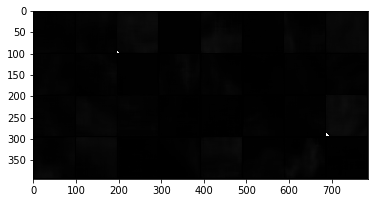

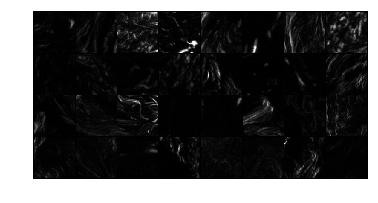

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


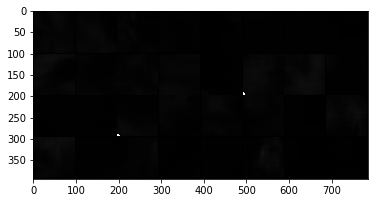

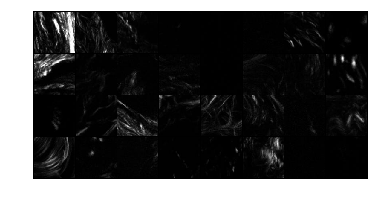

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


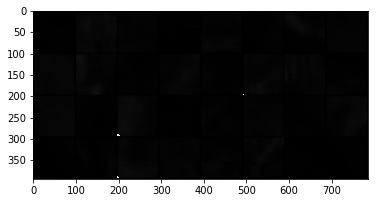

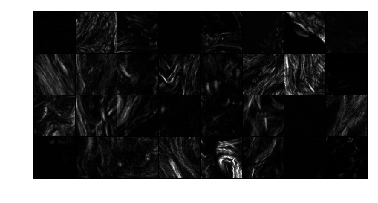

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


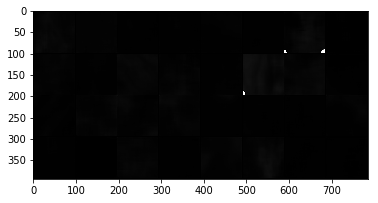

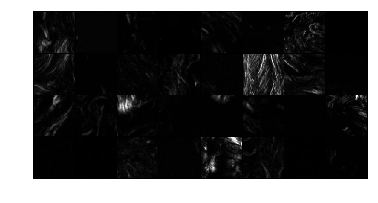

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


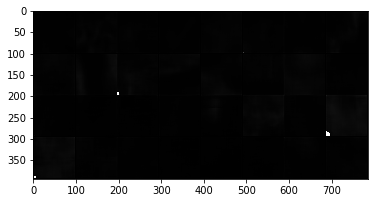

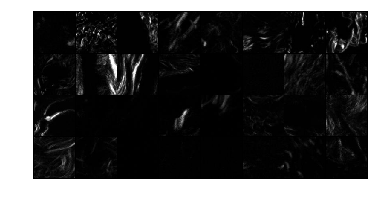

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


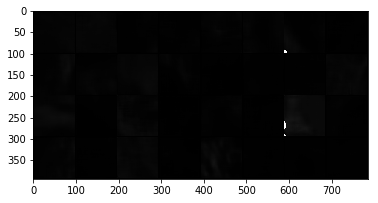

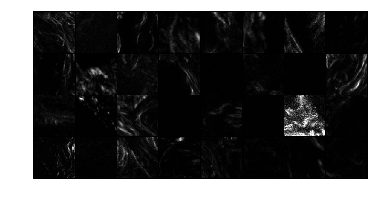

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


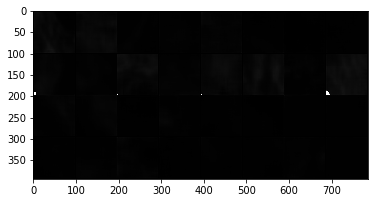

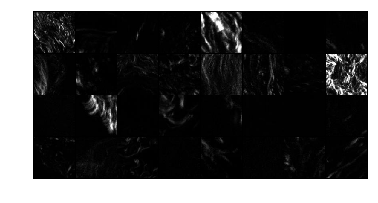

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


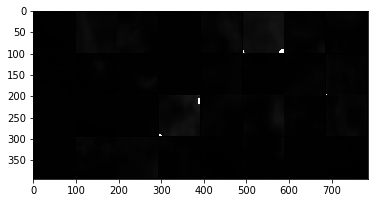

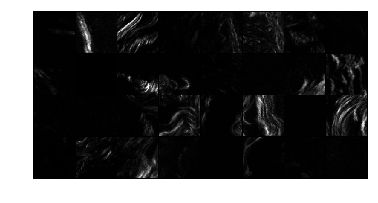

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


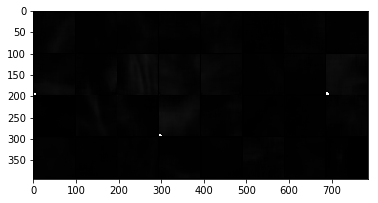

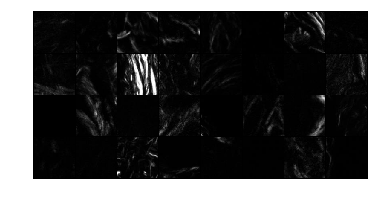

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


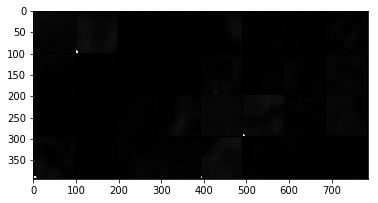

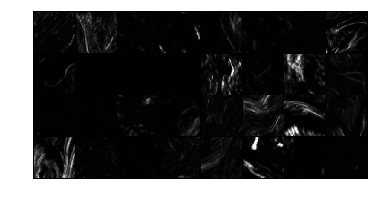

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


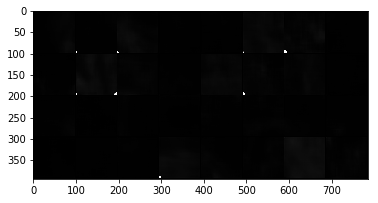

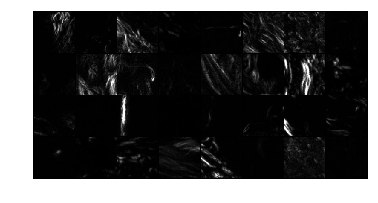

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


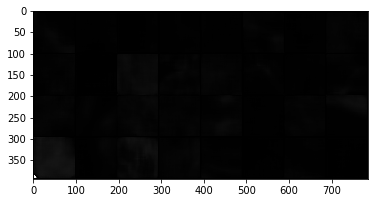

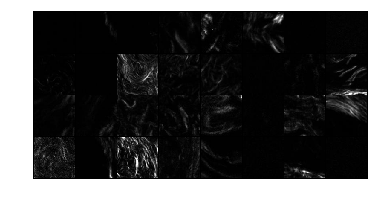

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


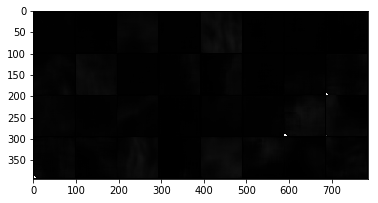

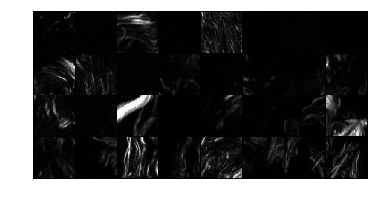

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


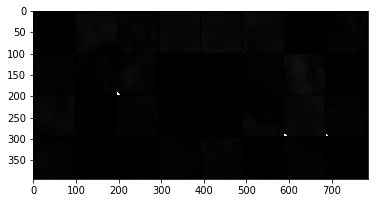

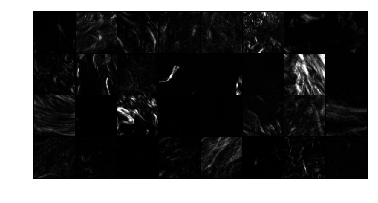

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


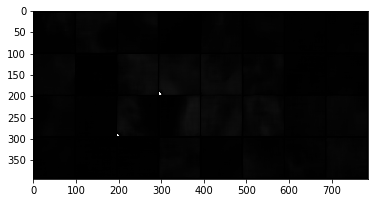

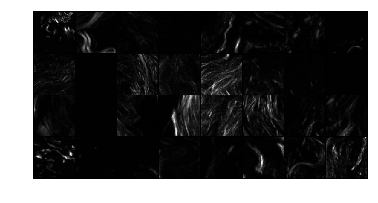

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


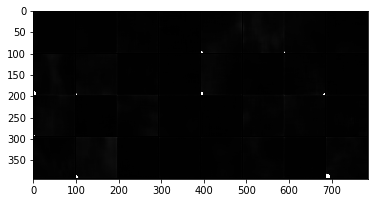

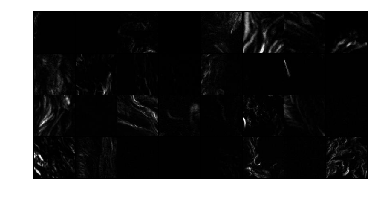

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


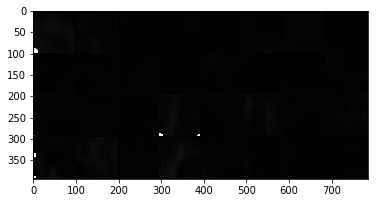

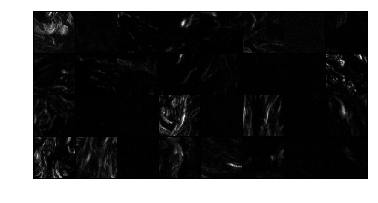

===> Avg. PSNR: nan dB


In [16]:
test()

In [ ]:
l = 0.0001
p = 0
windowsize = 4
for epoch in range(1, 20 + 1):
    if epoch%5 == 0:
        windowsize = windowsize+1
        p = p*1
        l = l*0.2
        if windowsize == 0:
            windowsze = 1
    optimizer = optim.Adam(model.parameters(), lr=l)
        
    train(epoch, p, windowsize)

lossMSE: 0.005445152521133423 lossSSIM: 0.21207815408706665
===> Epoch[1](0/25343): Loss: 0.2121
lossMSE: 0.005731702782213688 lossSSIM: 0.2300068736076355
===> Epoch[1](50/25343): Loss: 0.2300
lossMSE: 0.003919420298188925 lossSSIM: 0.24629193544387817
===> Epoch[1](100/25343): Loss: 0.2463
lossMSE: 0.007355845533311367 lossSSIM: 0.25549185276031494
===> Epoch[1](150/25343): Loss: 0.2555
lossMSE: 0.00691476883366704 lossSSIM: 0.3062111735343933
===> Epoch[1](200/25343): Loss: 0.3062
lossMSE: 0.009155730716884136 lossSSIM: 0.2729254961013794
===> Epoch[1](250/25343): Loss: 0.2729
lossMSE: 0.017258888110518456 lossSSIM: 0.26367640495300293
===> Epoch[1](300/25343): Loss: 0.2637
lossMSE: 0.008475192822515965 lossSSIM: 0.23064255714416504
===> Epoch[1](350/25343): Loss: 0.2306
lossMSE: 0.005008181557059288 lossSSIM: 0.25463032722473145
===> Epoch[1](400/25343): Loss: 0.2546
lossMSE: 0.0049122972413897514 lossSSIM: 0.23310458660125732
===> Epoch[1](450/25343): Loss: 0.2331
lossMSE: 0.00589

lossMSE: 0.006599316839128733 lossSSIM: 0.2462744116783142
===> Epoch[1](4150/25343): Loss: 0.2463
lossMSE: 0.003723058383911848 lossSSIM: 0.208038330078125
===> Epoch[1](4200/25343): Loss: 0.2080
lossMSE: 0.004642469808459282 lossSSIM: 0.21625083684921265
===> Epoch[1](4250/25343): Loss: 0.2163
lossMSE: 0.0054813590832054615 lossSSIM: 0.24214810132980347
===> Epoch[1](4300/25343): Loss: 0.2421
lossMSE: 0.009178632870316505 lossSSIM: 0.3063434958457947
===> Epoch[1](4350/25343): Loss: 0.3063
lossMSE: 0.00793630350381136 lossSSIM: 0.24060428142547607
===> Epoch[1](4400/25343): Loss: 0.2406
lossMSE: 0.017265425994992256 lossSSIM: 0.2710014581680298
===> Epoch[1](4450/25343): Loss: 0.2710
lossMSE: 0.007835275493562222 lossSSIM: 0.2791743874549866
===> Epoch[1](4500/25343): Loss: 0.2792
lossMSE: 0.0038829578552395105 lossSSIM: 0.21885675191879272
===> Epoch[1](4550/25343): Loss: 0.2189
lossMSE: 0.0038239455316215754 lossSSIM: 0.2621636390686035
===> Epoch[1](4600/25343): Loss: 0.2622
lossM

lossMSE: 0.007266843691468239 lossSSIM: 0.2582554817199707
===> Epoch[1](8300/25343): Loss: 0.2583
lossMSE: 0.009050126187503338 lossSSIM: 0.2234421968460083
===> Epoch[1](8350/25343): Loss: 0.2234
lossMSE: 0.013887347653508186 lossSSIM: 0.2790794372558594
===> Epoch[1](8400/25343): Loss: 0.2791
lossMSE: 0.009084590710699558 lossSSIM: 0.2317294478416443
===> Epoch[1](8450/25343): Loss: 0.2317
lossMSE: 0.008798542432487011 lossSSIM: 0.26862066984176636
===> Epoch[1](8500/25343): Loss: 0.2686
lossMSE: 0.00850010383874178 lossSSIM: 0.20866495370864868
===> Epoch[1](8550/25343): Loss: 0.2087
lossMSE: 0.0071974461898207664 lossSSIM: 0.23698371648788452
===> Epoch[1](8600/25343): Loss: 0.2370
lossMSE: 0.006699441000819206 lossSSIM: 0.23409807682037354
===> Epoch[1](8650/25343): Loss: 0.2341
lossMSE: 0.00678374944254756 lossSSIM: 0.2462407946586609
===> Epoch[1](8700/25343): Loss: 0.2462
lossMSE: 0.00829155370593071 lossSSIM: 0.28898727893829346
===> Epoch[1](8750/25343): Loss: 0.2890
lossMSE

lossMSE: 0.00702930660918355 lossSSIM: 0.31429362297058105
===> Epoch[1](12400/25343): Loss: 0.3143
lossMSE: 0.002745912643149495 lossSSIM: 0.18261092901229858
===> Epoch[1](12450/25343): Loss: 0.1826
lossMSE: 0.008233067579567432 lossSSIM: 0.2675153613090515
===> Epoch[1](12500/25343): Loss: 0.2675
lossMSE: 0.0034877127036452293 lossSSIM: 0.22846609354019165
===> Epoch[1](12550/25343): Loss: 0.2285
lossMSE: 0.003624927718192339 lossSSIM: 0.2476099133491516
===> Epoch[1](12600/25343): Loss: 0.2476
lossMSE: 0.006359007675200701 lossSSIM: 0.26802605390548706
===> Epoch[1](12650/25343): Loss: 0.2680
lossMSE: 0.007531076669692993 lossSSIM: 0.2882389426231384
===> Epoch[1](12700/25343): Loss: 0.2882
lossMSE: 0.008263150230050087 lossSSIM: 0.24871009588241577
===> Epoch[1](12750/25343): Loss: 0.2487
lossMSE: 0.013900663703680038 lossSSIM: 0.26523739099502563
===> Epoch[1](12800/25343): Loss: 0.2652
lossMSE: 0.004283873829990625 lossSSIM: 0.25708603858947754
===> Epoch[1](12850/25343): Loss: 

lossMSE: 0.005000995472073555 lossSSIM: 0.2589341402053833
===> Epoch[1](16500/25343): Loss: 0.2589
lossMSE: 0.00859031081199646 lossSSIM: 0.23207110166549683
===> Epoch[1](16550/25343): Loss: 0.2321
lossMSE: 0.007507986389100552 lossSSIM: 0.25055646896362305
===> Epoch[1](16600/25343): Loss: 0.2506
lossMSE: 0.007450914941728115 lossSSIM: 0.224900484085083
===> Epoch[1](16650/25343): Loss: 0.2249
lossMSE: 0.005555413663387299 lossSSIM: 0.2633175849914551
===> Epoch[1](16700/25343): Loss: 0.2633
lossMSE: 0.004688609857112169 lossSSIM: 0.223835289478302
===> Epoch[1](16750/25343): Loss: 0.2238
lossMSE: 0.01430566143244505 lossSSIM: 0.25520622730255127
===> Epoch[1](16800/25343): Loss: 0.2552
lossMSE: 0.0045400820672512054 lossSSIM: 0.2386559247970581
===> Epoch[1](16850/25343): Loss: 0.2387
lossMSE: 0.007100389339029789 lossSSIM: 0.23975121974945068
===> Epoch[1](16900/25343): Loss: 0.2398
lossMSE: 0.003338366514071822 lossSSIM: 0.20567196607589722
===> Epoch[1](16950/25343): Loss: 0.205

lossMSE: 0.007531245704740286 lossSSIM: 0.25320541858673096
===> Epoch[1](20600/25343): Loss: 0.2532
lossMSE: 0.00367823988199234 lossSSIM: 0.20178407430648804
===> Epoch[1](20650/25343): Loss: 0.2018
lossMSE: 0.005603731144219637 lossSSIM: 0.2138574719429016
===> Epoch[1](20700/25343): Loss: 0.2139
lossMSE: 0.008443817496299744 lossSSIM: 0.23313546180725098
===> Epoch[1](20750/25343): Loss: 0.2331
lossMSE: 0.006878519430756569 lossSSIM: 0.25036758184432983
===> Epoch[1](20800/25343): Loss: 0.2504
lossMSE: 0.006907776463776827 lossSSIM: 0.22549790143966675
===> Epoch[1](20850/25343): Loss: 0.2255
lossMSE: 0.0034046878572553396 lossSSIM: 0.20278429985046387
===> Epoch[1](20900/25343): Loss: 0.2028
lossMSE: 0.0075041851960122585 lossSSIM: 0.23630839586257935
===> Epoch[1](20950/25343): Loss: 0.2363
lossMSE: 0.0066659110598266125 lossSSIM: 0.21187669038772583
===> Epoch[1](21000/25343): Loss: 0.2119
lossMSE: 0.009711163118481636 lossSSIM: 0.28272736072540283
===> Epoch[1](21050/25343): Lo

lossMSE: 0.009203772991895676 lossSSIM: 0.2774125337600708
===> Epoch[1](24700/25343): Loss: 0.2774
lossMSE: 0.011208944953978062 lossSSIM: 0.29162728786468506
===> Epoch[1](24750/25343): Loss: 0.2916
lossMSE: 0.005811406299471855 lossSSIM: 0.26262617111206055
===> Epoch[1](24800/25343): Loss: 0.2626
lossMSE: 0.010117963887751102 lossSSIM: 0.2454434037208557
===> Epoch[1](24850/25343): Loss: 0.2454
lossMSE: 0.011807559989392757 lossSSIM: 0.3367944359779358
===> Epoch[1](24900/25343): Loss: 0.3368
lossMSE: 0.0064798323437571526 lossSSIM: 0.284720778465271
===> Epoch[1](24950/25343): Loss: 0.2847
lossMSE: 0.00438536936417222 lossSSIM: 0.24479776620864868
===> Epoch[1](25000/25343): Loss: 0.2448
lossMSE: 0.010148651897907257 lossSSIM: 0.24339306354522705
===> Epoch[1](25050/25343): Loss: 0.2434
lossMSE: 0.012282752431929111 lossSSIM: 0.27208924293518066
===> Epoch[1](25100/25343): Loss: 0.2721
lossMSE: 0.006500196643173695 lossSSIM: 0.24561774730682373
===> Epoch[1](25150/25343): Loss: 0.

lossMSE: 0.0025429492816329002 lossSSIM: 0.18875885009765625
===> Epoch[2](3450/25343): Loss: 0.1888
lossMSE: 0.004535804037004709 lossSSIM: 0.2751365900039673
===> Epoch[2](3500/25343): Loss: 0.2751
lossMSE: 0.008267728611826897 lossSSIM: 0.3007635474205017
===> Epoch[2](3550/25343): Loss: 0.3008
lossMSE: 0.0022345646284520626 lossSSIM: 0.1890648603439331
===> Epoch[2](3600/25343): Loss: 0.1891
lossMSE: 0.006895293481647968 lossSSIM: 0.24579811096191406
===> Epoch[2](3650/25343): Loss: 0.2458
lossMSE: 0.009219812229275703 lossSSIM: 0.23768949508666992
===> Epoch[2](3700/25343): Loss: 0.2377
lossMSE: 0.008184033446013927 lossSSIM: 0.2978336811065674
===> Epoch[2](3750/25343): Loss: 0.2978
lossMSE: 0.004777359310537577 lossSSIM: 0.27233606576919556
===> Epoch[2](3800/25343): Loss: 0.2723
lossMSE: 0.004879517946392298 lossSSIM: 0.26973193883895874
===> Epoch[2](3850/25343): Loss: 0.2697
lossMSE: 0.001831170986406505 lossSSIM: 0.1853116750717163
===> Epoch[2](3900/25343): Loss: 0.1853
los

lossMSE: 0.012839319184422493 lossSSIM: 0.2803497910499573
===> Epoch[2](7600/25343): Loss: 0.2803
lossMSE: 0.009055119007825851 lossSSIM: 0.323789119720459
===> Epoch[2](7650/25343): Loss: 0.3238
lossMSE: 0.017479771748185158 lossSSIM: 0.3205326795578003
===> Epoch[2](7700/25343): Loss: 0.3205
lossMSE: 0.007894324138760567 lossSSIM: 0.25685930252075195
===> Epoch[2](7750/25343): Loss: 0.2569
lossMSE: 0.011667026206851006 lossSSIM: 0.31820887327194214
===> Epoch[2](7800/25343): Loss: 0.3182
lossMSE: 0.008767996914684772 lossSSIM: 0.27980929613113403
===> Epoch[2](7850/25343): Loss: 0.2798
lossMSE: 0.0082726264372468 lossSSIM: 0.2878774404525757
===> Epoch[2](7900/25343): Loss: 0.2879
lossMSE: 0.002134375274181366 lossSSIM: 0.19393491744995117
===> Epoch[2](7950/25343): Loss: 0.1939
lossMSE: 0.009440969675779343 lossSSIM: 0.28835219144821167
===> Epoch[2](8000/25343): Loss: 0.2884
lossMSE: 0.011896904557943344 lossSSIM: 0.33215636014938354
===> Epoch[2](8050/25343): Loss: 0.3322
lossMSE

lossMSE: 0.002176038920879364 lossSSIM: 0.2058921456336975
===> Epoch[2](11750/25343): Loss: 0.2059
lossMSE: 0.005173403304070234 lossSSIM: 0.2477986216545105
===> Epoch[2](11800/25343): Loss: 0.2478
lossMSE: 0.0037625348195433617 lossSSIM: 0.18863993883132935
===> Epoch[2](11850/25343): Loss: 0.1886
lossMSE: 0.0043077170848846436 lossSSIM: 0.26180750131607056
===> Epoch[2](11900/25343): Loss: 0.2618
lossMSE: 0.008147355169057846 lossSSIM: 0.26456737518310547
===> Epoch[2](11950/25343): Loss: 0.2646
lossMSE: 0.006884551607072353 lossSSIM: 0.2930207848548889
===> Epoch[2](12000/25343): Loss: 0.2930
lossMSE: 0.010502164252102375 lossSSIM: 0.30533379316329956
===> Epoch[2](12050/25343): Loss: 0.3053
lossMSE: 0.007051678374409676 lossSSIM: 0.22794723510742188
===> Epoch[2](12100/25343): Loss: 0.2279
lossMSE: 0.005331550724804401 lossSSIM: 0.2614247798919678
===> Epoch[2](12150/25343): Loss: 0.2614
lossMSE: 0.002289150608703494 lossSSIM: 0.19476288557052612
===> Epoch[2](12200/25343): Loss:

lossMSE: 0.004585332702845335 lossSSIM: 0.25344544649124146
===> Epoch[2](15850/25343): Loss: 0.2534
lossMSE: 0.009877227246761322 lossSSIM: 0.277641236782074
===> Epoch[2](15900/25343): Loss: 0.2776
lossMSE: 0.006078770384192467 lossSSIM: 0.259395956993103
===> Epoch[2](15950/25343): Loss: 0.2594
lossMSE: 0.005986104719340801 lossSSIM: 0.21514791250228882
===> Epoch[2](16000/25343): Loss: 0.2151
lossMSE: 0.004775502718985081 lossSSIM: 0.24318170547485352
===> Epoch[2](16050/25343): Loss: 0.2432
lossMSE: 0.006490794476121664 lossSSIM: 0.24611902236938477
===> Epoch[2](16100/25343): Loss: 0.2461
lossMSE: 0.004962219391018152 lossSSIM: 0.27125465869903564
===> Epoch[2](16150/25343): Loss: 0.2713
lossMSE: 0.011269153095781803 lossSSIM: 0.2573322653770447
===> Epoch[2](16200/25343): Loss: 0.2573
lossMSE: 0.006363175809383392 lossSSIM: 0.25674211978912354
===> Epoch[2](16250/25343): Loss: 0.2567
lossMSE: 0.0059304977767169476 lossSSIM: 0.24425965547561646
===> Epoch[2](16300/25343): Loss: 0

lossMSE: 0.009926434606313705 lossSSIM: 0.29765504598617554
===> Epoch[2](19950/25343): Loss: 0.2977
lossMSE: 0.003944937605410814 lossSSIM: 0.2660468816757202
===> Epoch[2](20000/25343): Loss: 0.2660
lossMSE: 0.009218569844961166 lossSSIM: 0.28348439931869507
===> Epoch[2](20050/25343): Loss: 0.2835
lossMSE: 0.00494011677801609 lossSSIM: 0.23598355054855347
===> Epoch[2](20100/25343): Loss: 0.2360
lossMSE: 0.010776098817586899 lossSSIM: 0.22921085357666016
===> Epoch[2](20150/25343): Loss: 0.2292
lossMSE: 0.0054428293369710445 lossSSIM: 0.22598016262054443
===> Epoch[2](20200/25343): Loss: 0.2260
lossMSE: 0.017965128645300865 lossSSIM: 0.30425477027893066
===> Epoch[2](20250/25343): Loss: 0.3043
lossMSE: 0.00519199576228857 lossSSIM: 0.2638756036758423
===> Epoch[2](20300/25343): Loss: 0.2639
lossMSE: 0.004263835493475199 lossSSIM: 0.24984127283096313
===> Epoch[2](20350/25343): Loss: 0.2498
lossMSE: 0.006472311913967133 lossSSIM: 0.23263001441955566
===> Epoch[2](20400/25343): Loss: 

lossMSE: 0.007279319688677788 lossSSIM: 0.2613300085067749
===> Epoch[2](24050/25343): Loss: 0.2613
lossMSE: 0.0026539976242929697 lossSSIM: 0.24509906768798828
===> Epoch[2](24100/25343): Loss: 0.2451
lossMSE: 0.0066069867461919785 lossSSIM: 0.2821655869483948
===> Epoch[2](24150/25343): Loss: 0.2822
lossMSE: 0.006514479871839285 lossSSIM: 0.2654985785484314
===> Epoch[2](24200/25343): Loss: 0.2655
lossMSE: 0.005570472218096256 lossSSIM: 0.22078973054885864
===> Epoch[2](24250/25343): Loss: 0.2208
lossMSE: 0.004610616248100996 lossSSIM: 0.2541252374649048
===> Epoch[2](24300/25343): Loss: 0.2541
lossMSE: 0.010247107595205307 lossSSIM: 0.259546160697937
===> Epoch[2](24350/25343): Loss: 0.2595
lossMSE: 0.005963629577308893 lossSSIM: 0.21817713975906372
===> Epoch[2](24400/25343): Loss: 0.2182
lossMSE: 0.0034982049837708473 lossSSIM: 0.24077898263931274
===> Epoch[2](24450/25343): Loss: 0.2408
lossMSE: 0.00586335314437747 lossSSIM: 0.22200024127960205
===> Epoch[2](24500/25343): Loss: 0

lossMSE: 0.005923766177147627 lossSSIM: 0.24946379661560059
===> Epoch[3](2800/25343): Loss: 0.2495
lossMSE: 0.007811902090907097 lossSSIM: 0.22389841079711914
===> Epoch[3](2850/25343): Loss: 0.2239
lossMSE: 0.004144564270973206 lossSSIM: 0.2320447564125061
===> Epoch[3](2900/25343): Loss: 0.2320
lossMSE: 0.004007458686828613 lossSSIM: 0.2554129362106323
===> Epoch[3](2950/25343): Loss: 0.2554
lossMSE: 0.003684588707983494 lossSSIM: 0.19058066606521606
===> Epoch[3](3000/25343): Loss: 0.1906
lossMSE: 0.005575092975050211 lossSSIM: 0.2506524324417114
===> Epoch[3](3050/25343): Loss: 0.2507
lossMSE: 0.009218869730830193 lossSSIM: 0.2993394136428833
===> Epoch[3](3100/25343): Loss: 0.2993
lossMSE: 0.013286039233207703 lossSSIM: 0.2922056317329407
===> Epoch[3](3150/25343): Loss: 0.2922
lossMSE: 0.013965483754873276 lossSSIM: 0.2951129674911499
===> Epoch[3](3200/25343): Loss: 0.2951
lossMSE: 0.006327356677502394 lossSSIM: 0.2781968116760254
===> Epoch[3](3250/25343): Loss: 0.2782
lossMSE

lossMSE: 0.02835976704955101 lossSSIM: 0.30745166540145874
===> Epoch[3](6950/25343): Loss: 0.3075
lossMSE: 0.014654074795544147 lossSSIM: 0.2977890372276306
===> Epoch[3](7000/25343): Loss: 0.2978
lossMSE: 0.0054389238357543945 lossSSIM: 0.2580457925796509
===> Epoch[3](7050/25343): Loss: 0.2580
lossMSE: 0.013562111184000969 lossSSIM: 0.29569774866104126
===> Epoch[3](7100/25343): Loss: 0.2957
lossMSE: 0.008877272717654705 lossSSIM: 0.26091086864471436
===> Epoch[3](7150/25343): Loss: 0.2609
lossMSE: 0.004763183183968067 lossSSIM: 0.2213950753211975
===> Epoch[3](7200/25343): Loss: 0.2214
lossMSE: 0.009915877133607864 lossSSIM: 0.2418537735939026
===> Epoch[3](7250/25343): Loss: 0.2419
lossMSE: 0.0048538511618971825 lossSSIM: 0.21848636865615845
===> Epoch[3](7300/25343): Loss: 0.2185
lossMSE: 0.006154106929898262 lossSSIM: 0.2692764401435852
===> Epoch[3](7350/25343): Loss: 0.2693
lossMSE: 0.003906502388417721 lossSSIM: 0.20406508445739746
===> Epoch[3](7400/25343): Loss: 0.2041
loss

lossMSE: 0.006762342993170023 lossSSIM: 0.229455828666687
===> Epoch[3](11100/25343): Loss: 0.2295
lossMSE: 0.010153236798942089 lossSSIM: 0.28585994243621826
===> Epoch[3](11150/25343): Loss: 0.2859
lossMSE: 0.0034999384079128504 lossSSIM: 0.24195986986160278
===> Epoch[3](11200/25343): Loss: 0.2420
lossMSE: 0.002799614565446973 lossSSIM: 0.22677922248840332
===> Epoch[3](11250/25343): Loss: 0.2268
lossMSE: 0.006442834623157978 lossSSIM: 0.2585371136665344
===> Epoch[3](11300/25343): Loss: 0.2585
lossMSE: 0.007045034784823656 lossSSIM: 0.22441625595092773
===> Epoch[3](11350/25343): Loss: 0.2244
lossMSE: 0.008109349757432938 lossSSIM: 0.25490057468414307
===> Epoch[3](11400/25343): Loss: 0.2549
lossMSE: 0.017005302011966705 lossSSIM: 0.29888635873794556
===> Epoch[3](11450/25343): Loss: 0.2989
lossMSE: 0.009221789427101612 lossSSIM: 0.2437252402305603
===> Epoch[3](11500/25343): Loss: 0.2437
lossMSE: 0.006862625014036894 lossSSIM: 0.24848127365112305
===> Epoch[3](11550/25343): Loss: 

lossMSE: 0.00789081584662199 lossSSIM: 0.25202620029449463
===> Epoch[3](15200/25343): Loss: 0.2520
lossMSE: 0.00846866425126791 lossSSIM: 0.3157494068145752
===> Epoch[3](15250/25343): Loss: 0.3157
lossMSE: 0.004833924118429422 lossSSIM: 0.2297331690788269
===> Epoch[3](15300/25343): Loss: 0.2297
lossMSE: 0.0025236026849597692 lossSSIM: 0.18424028158187866
===> Epoch[3](15350/25343): Loss: 0.1842
lossMSE: 0.0053272610530257225 lossSSIM: 0.23008298873901367
===> Epoch[3](15400/25343): Loss: 0.2301
lossMSE: 0.007338330149650574 lossSSIM: 0.25155264139175415
===> Epoch[3](15450/25343): Loss: 0.2516
lossMSE: 0.012201718986034393 lossSSIM: 0.26270878314971924
===> Epoch[3](15500/25343): Loss: 0.2627
lossMSE: 0.007378025911748409 lossSSIM: 0.2831457853317261
===> Epoch[3](15550/25343): Loss: 0.2831
lossMSE: 0.010088094510138035 lossSSIM: 0.281724214553833
===> Epoch[3](15600/25343): Loss: 0.2817
lossMSE: 0.004107717890292406 lossSSIM: 0.21211159229278564
===> Epoch[3](15650/25343): Loss: 0.

lossMSE: 0.004124793689697981 lossSSIM: 0.2330140471458435
===> Epoch[3](19300/25343): Loss: 0.2330
lossMSE: 0.010576036758720875 lossSSIM: 0.26284122467041016
===> Epoch[3](19350/25343): Loss: 0.2628
lossMSE: 0.003714758437126875 lossSSIM: 0.23028522729873657
===> Epoch[3](19400/25343): Loss: 0.2303
lossMSE: 0.008510561659932137 lossSSIM: 0.2948053479194641
===> Epoch[3](19450/25343): Loss: 0.2948
lossMSE: 0.007340484298765659 lossSSIM: 0.22875744104385376
===> Epoch[3](19500/25343): Loss: 0.2288
lossMSE: 0.00715642748400569 lossSSIM: 0.28701239824295044
===> Epoch[3](19550/25343): Loss: 0.2870
lossMSE: 0.010787248611450195 lossSSIM: 0.280376672744751
===> Epoch[3](19600/25343): Loss: 0.2804
lossMSE: 0.013150596059858799 lossSSIM: 0.3365698456764221
===> Epoch[3](19650/25343): Loss: 0.3366
lossMSE: 0.004620017949491739 lossSSIM: 0.21367353200912476
===> Epoch[3](19700/25343): Loss: 0.2137
lossMSE: 0.010964583605527878 lossSSIM: 0.23838084936141968
===> Epoch[3](19750/25343): Loss: 0.2

lossMSE: 0.00628619035705924 lossSSIM: 0.2438144087791443
===> Epoch[3](23400/25343): Loss: 0.2438
lossMSE: 0.005270687863230705 lossSSIM: 0.21368801593780518
===> Epoch[3](23450/25343): Loss: 0.2137
lossMSE: 0.01577087491750717 lossSSIM: 0.2594066858291626
===> Epoch[3](23500/25343): Loss: 0.2594
lossMSE: 0.0049952794797718525 lossSSIM: 0.23416471481323242
===> Epoch[3](23550/25343): Loss: 0.2342
lossMSE: 0.006182536482810974 lossSSIM: 0.21541136503219604
===> Epoch[3](23600/25343): Loss: 0.2154
lossMSE: 0.00501679303124547 lossSSIM: 0.2734155058860779
===> Epoch[3](23650/25343): Loss: 0.2734
lossMSE: 0.005257361568510532 lossSSIM: 0.2764623761177063
===> Epoch[3](23700/25343): Loss: 0.2765
lossMSE: 0.005447936709970236 lossSSIM: 0.23673242330551147
===> Epoch[3](23750/25343): Loss: 0.2367
lossMSE: 0.002084922045469284 lossSSIM: 0.19369834661483765
===> Epoch[3](23800/25343): Loss: 0.1937
lossMSE: 0.007043580058962107 lossSSIM: 0.24934345483779907
===> Epoch[3](23850/25343): Loss: 0.2

lossMSE: 0.008412983268499374 lossSSIM: 0.24618685245513916
===> Epoch[4](2150/25343): Loss: 0.2462
lossMSE: 0.008250441402196884 lossSSIM: 0.24730229377746582
===> Epoch[4](2200/25343): Loss: 0.2473
lossMSE: 0.01072695478796959 lossSSIM: 0.27227818965911865
===> Epoch[4](2250/25343): Loss: 0.2723
lossMSE: 0.00525073055177927 lossSSIM: 0.23858439922332764
===> Epoch[4](2300/25343): Loss: 0.2386
lossMSE: 0.004547835327684879 lossSSIM: 0.21030056476593018
===> Epoch[4](2350/25343): Loss: 0.2103
lossMSE: 0.010444308631122112 lossSSIM: 0.2516983151435852
===> Epoch[4](2400/25343): Loss: 0.2517
lossMSE: 0.005549563094973564 lossSSIM: 0.26699525117874146
===> Epoch[4](2450/25343): Loss: 0.2670
lossMSE: 0.004809868987649679 lossSSIM: 0.23662137985229492
===> Epoch[4](2500/25343): Loss: 0.2366
lossMSE: 0.004280672874301672 lossSSIM: 0.2577770948410034
===> Epoch[4](2550/25343): Loss: 0.2578
lossMSE: 0.00734013132750988 lossSSIM: 0.25045138597488403
===> Epoch[4](2600/25343): Loss: 0.2505
lossM

lossMSE: 0.0031400183215737343 lossSSIM: 0.19925928115844727
===> Epoch[4](6300/25343): Loss: 0.1993
lossMSE: 0.0031096069142222404 lossSSIM: 0.25284457206726074
===> Epoch[4](6350/25343): Loss: 0.2528
lossMSE: 0.008185897953808308 lossSSIM: 0.23159533739089966
===> Epoch[4](6400/25343): Loss: 0.2316
lossMSE: 0.012515167705714703 lossSSIM: 0.28214961290359497
===> Epoch[4](6450/25343): Loss: 0.2821
lossMSE: 0.00885129813104868 lossSSIM: 0.2454380989074707
===> Epoch[4](6500/25343): Loss: 0.2454
lossMSE: 0.0069123622961342335 lossSSIM: 0.263643741607666
===> Epoch[4](6550/25343): Loss: 0.2636
lossMSE: 0.006099766120314598 lossSSIM: 0.2517624497413635
===> Epoch[4](6600/25343): Loss: 0.2518
lossMSE: 0.006140462122857571 lossSSIM: 0.26630836725234985
===> Epoch[4](6650/25343): Loss: 0.2663
lossMSE: 0.006491900887340307 lossSSIM: 0.221920907497406
===> Epoch[4](6700/25343): Loss: 0.2219
lossMSE: 0.01051904633641243 lossSSIM: 0.2639142870903015
===> Epoch[4](6750/25343): Loss: 0.2639
lossMS

lossMSE: 0.005385105963796377 lossSSIM: 0.2594359517097473
===> Epoch[4](10450/25343): Loss: 0.2594
lossMSE: 0.007694846950471401 lossSSIM: 0.2480781078338623
===> Epoch[4](10500/25343): Loss: 0.2481
lossMSE: 0.01350441388785839 lossSSIM: 0.29656660556793213
===> Epoch[4](10550/25343): Loss: 0.2966
lossMSE: 0.004767837002873421 lossSSIM: 0.2584991455078125
===> Epoch[4](10600/25343): Loss: 0.2585
lossMSE: 0.0046013034880161285 lossSSIM: 0.20348918437957764
===> Epoch[4](10650/25343): Loss: 0.2035
lossMSE: 0.0031128530390560627 lossSSIM: 0.24444317817687988
===> Epoch[4](10700/25343): Loss: 0.2444
lossMSE: 0.008209559135138988 lossSSIM: 0.29768794775009155
===> Epoch[4](10750/25343): Loss: 0.2977
lossMSE: 0.00604176614433527 lossSSIM: 0.23219561576843262
===> Epoch[4](10800/25343): Loss: 0.2322
lossMSE: 0.0038028517737984657 lossSSIM: 0.22675460577011108
===> Epoch[4](10850/25343): Loss: 0.2268
lossMSE: 0.003236152930185199 lossSSIM: 0.19266152381896973
===> Epoch[4](10900/25343): Loss:

lossMSE: 0.009353919886052608 lossSSIM: 0.27067863941192627
===> Epoch[4](14550/25343): Loss: 0.2707
lossMSE: 0.007202101871371269 lossSSIM: 0.29889869689941406
===> Epoch[4](14600/25343): Loss: 0.2989
lossMSE: 0.0034950822591781616 lossSSIM: 0.2156428098678589
===> Epoch[4](14650/25343): Loss: 0.2156
lossMSE: 0.003974860534071922 lossSSIM: 0.22885459661483765
===> Epoch[4](14700/25343): Loss: 0.2289
lossMSE: 0.005238932091742754 lossSSIM: 0.2297196388244629
===> Epoch[4](14750/25343): Loss: 0.2297
lossMSE: 0.004061853513121605 lossSSIM: 0.2020418643951416
===> Epoch[4](14800/25343): Loss: 0.2020
lossMSE: 0.0067995167337358 lossSSIM: 0.2391536831855774
===> Epoch[4](14850/25343): Loss: 0.2392
lossMSE: 0.0035892571322619915 lossSSIM: 0.21034210920333862
===> Epoch[4](14900/25343): Loss: 0.2103
lossMSE: 0.01486873161047697 lossSSIM: 0.2729071378707886
===> Epoch[4](14950/25343): Loss: 0.2729
lossMSE: 0.005378177389502525 lossSSIM: 0.23032742738723755
===> Epoch[4](15000/25343): Loss: 0.2

lossMSE: 0.004251367412507534 lossSSIM: 0.20103353261947632
===> Epoch[4](18650/25343): Loss: 0.2010
lossMSE: 0.0035925235133618116 lossSSIM: 0.20909786224365234
===> Epoch[4](18700/25343): Loss: 0.2091
lossMSE: 0.013190191239118576 lossSSIM: 0.31676071882247925
===> Epoch[4](18750/25343): Loss: 0.3168
lossMSE: 0.004836720880120993 lossSSIM: 0.2191905379295349
===> Epoch[4](18800/25343): Loss: 0.2192
lossMSE: 0.0048131076619029045 lossSSIM: 0.26049894094467163
===> Epoch[4](18850/25343): Loss: 0.2605
lossMSE: 0.0039649587124586105 lossSSIM: 0.2600367069244385
===> Epoch[4](18900/25343): Loss: 0.2600
lossMSE: 0.010386158712208271 lossSSIM: 0.3093787431716919
===> Epoch[4](18950/25343): Loss: 0.3094
lossMSE: 0.0025589936412870884 lossSSIM: 0.21583259105682373
===> Epoch[4](19000/25343): Loss: 0.2158
lossMSE: 0.00367752555757761 lossSSIM: 0.26398295164108276
===> Epoch[4](19050/25343): Loss: 0.2640
lossMSE: 0.006974279880523682 lossSSIM: 0.27584654092788696
===> Epoch[4](19100/25343): Los

lossMSE: 0.00353665160946548 lossSSIM: 0.22691196203231812
===> Epoch[4](22750/25343): Loss: 0.2269
lossMSE: 0.002691536210477352 lossSSIM: 0.2197750210762024
===> Epoch[4](22800/25343): Loss: 0.2198
lossMSE: 0.008657310158014297 lossSSIM: 0.28148388862609863
===> Epoch[4](22850/25343): Loss: 0.2815
lossMSE: 0.00570227624848485 lossSSIM: 0.24668002128601074
===> Epoch[4](22900/25343): Loss: 0.2467
lossMSE: 0.008264505304396152 lossSSIM: 0.27785706520080566
===> Epoch[4](22950/25343): Loss: 0.2779
lossMSE: 0.007079767528921366 lossSSIM: 0.2541223168373108
===> Epoch[4](23000/25343): Loss: 0.2541
lossMSE: 0.0038436492905020714 lossSSIM: 0.2233150601387024
===> Epoch[4](23050/25343): Loss: 0.2233
lossMSE: 0.009934844449162483 lossSSIM: 0.235204815864563
===> Epoch[4](23100/25343): Loss: 0.2352
lossMSE: 0.0027966962661594152 lossSSIM: 0.22592806816101074
===> Epoch[4](23150/25343): Loss: 0.2259
lossMSE: 0.008623615838587284 lossSSIM: 0.2677006721496582
===> Epoch[4](23200/25343): Loss: 0.2

lossMSE: 0.008450244553387165 lossSSIM: 0.2870023846626282
===> Epoch[5](1500/25343): Loss: 0.2870
lossMSE: 0.0038367898669093847 lossSSIM: 0.22748667001724243
===> Epoch[5](1550/25343): Loss: 0.2275
lossMSE: 0.005129432305693626 lossSSIM: 0.23878127336502075
===> Epoch[5](1600/25343): Loss: 0.2388
lossMSE: 0.008043806999921799 lossSSIM: 0.2780648469924927
===> Epoch[5](1650/25343): Loss: 0.2781
lossMSE: 0.005016640294343233 lossSSIM: 0.2531747817993164
===> Epoch[5](1700/25343): Loss: 0.2532
lossMSE: 0.00562023650854826 lossSSIM: 0.27303194999694824
===> Epoch[5](1750/25343): Loss: 0.2730
lossMSE: 0.006572375074028969 lossSSIM: 0.2645053267478943
===> Epoch[5](1800/25343): Loss: 0.2645
lossMSE: 0.0037764066364616156 lossSSIM: 0.25876712799072266
===> Epoch[5](1850/25343): Loss: 0.2588
lossMSE: 0.0042680297046899796 lossSSIM: 0.22244209051132202
===> Epoch[5](1900/25343): Loss: 0.2224
lossMSE: 0.00488947844132781 lossSSIM: 0.25501418113708496
===> Epoch[5](1950/25343): Loss: 0.2550
los

lossMSE: 0.011435241438448429 lossSSIM: 0.3165540099143982
===> Epoch[5](5650/25343): Loss: 0.3166
lossMSE: 0.005435156170278788 lossSSIM: 0.2804446816444397
===> Epoch[5](5700/25343): Loss: 0.2804
lossMSE: 0.005778124555945396 lossSSIM: 0.27244699001312256
===> Epoch[5](5750/25343): Loss: 0.2724
lossMSE: 0.004427431616932154 lossSSIM: 0.26323962211608887
===> Epoch[5](5800/25343): Loss: 0.2632
lossMSE: 0.00498559745028615 lossSSIM: 0.21997547149658203
===> Epoch[5](5850/25343): Loss: 0.2200
lossMSE: 0.011209450662136078 lossSSIM: 0.2924531102180481
===> Epoch[5](5900/25343): Loss: 0.2925
lossMSE: 0.012560023926198483 lossSSIM: 0.3899996280670166
===> Epoch[5](5950/25343): Loss: 0.3900
lossMSE: 0.005216111429035664 lossSSIM: 0.24044734239578247
===> Epoch[5](6000/25343): Loss: 0.2404
lossMSE: 0.009024906903505325 lossSSIM: 0.265708863735199
===> Epoch[5](6050/25343): Loss: 0.2657
lossMSE: 0.010080226697027683 lossSSIM: 0.2703142762184143
===> Epoch[5](6100/25343): Loss: 0.2703
lossMSE:

lossMSE: 0.008671890012919903 lossSSIM: 0.25550180673599243
===> Epoch[5](9800/25343): Loss: 0.2555
lossMSE: 0.01622491329908371 lossSSIM: 0.3138132691383362
===> Epoch[5](9850/25343): Loss: 0.3138
lossMSE: 0.0061547704972326756 lossSSIM: 0.210116446018219
===> Epoch[5](9900/25343): Loss: 0.2101
lossMSE: 0.00909501500427723 lossSSIM: 0.2472132444381714
===> Epoch[5](9950/25343): Loss: 0.2472
lossMSE: 0.007651426829397678 lossSSIM: 0.3011966347694397
===> Epoch[5](10000/25343): Loss: 0.3012
lossMSE: 0.005346463993191719 lossSSIM: 0.2714316248893738
===> Epoch[5](10050/25343): Loss: 0.2714
lossMSE: 0.007634222507476807 lossSSIM: 0.2894294857978821
===> Epoch[5](10100/25343): Loss: 0.2894
lossMSE: 0.008288743905723095 lossSSIM: 0.29192793369293213
===> Epoch[5](10150/25343): Loss: 0.2919
lossMSE: 0.011776029132306576 lossSSIM: 0.2772771120071411
===> Epoch[5](10200/25343): Loss: 0.2773
lossMSE: 0.006979751866310835 lossSSIM: 0.2489253282546997
===> Epoch[5](10250/25343): Loss: 0.2489
loss

lossMSE: 0.013252622447907925 lossSSIM: 0.3036424517631531
===> Epoch[5](13900/25343): Loss: 0.3036
lossMSE: 0.005231247283518314 lossSSIM: 0.28548961877822876
===> Epoch[5](13950/25343): Loss: 0.2855
lossMSE: 0.006429221946746111 lossSSIM: 0.27704131603240967
===> Epoch[5](14000/25343): Loss: 0.2770
lossMSE: 0.0039772712625563145 lossSSIM: 0.2523426413536072
===> Epoch[5](14050/25343): Loss: 0.2523
lossMSE: 0.01244730781763792 lossSSIM: 0.2461390495300293
===> Epoch[5](14100/25343): Loss: 0.2461
lossMSE: 0.007125193253159523 lossSSIM: 0.25533777475357056
===> Epoch[5](14150/25343): Loss: 0.2553
lossMSE: 0.0025328320916742086 lossSSIM: 0.20499330759048462
===> Epoch[5](14200/25343): Loss: 0.2050
lossMSE: 0.006527607794851065 lossSSIM: 0.2835221290588379
===> Epoch[5](14250/25343): Loss: 0.2835
lossMSE: 0.013737674802541733 lossSSIM: 0.3234795928001404
===> Epoch[5](14300/25343): Loss: 0.3235
lossMSE: 0.006378869991749525 lossSSIM: 0.29113155603408813
===> Epoch[5](14350/25343): Loss: 0

lossMSE: 0.009331192821264267 lossSSIM: 0.2948991656303406
===> Epoch[5](18000/25343): Loss: 0.2949
lossMSE: 0.0030962228775024414 lossSSIM: 0.2059975266456604
===> Epoch[5](18050/25343): Loss: 0.2060
lossMSE: 0.004024725407361984 lossSSIM: 0.19636332988739014
===> Epoch[5](18100/25343): Loss: 0.1964
lossMSE: 0.009003634564578533 lossSSIM: 0.33962100744247437
===> Epoch[5](18150/25343): Loss: 0.3396
lossMSE: 0.006044118665158749 lossSSIM: 0.22498339414596558
===> Epoch[5](18200/25343): Loss: 0.2250
lossMSE: 0.007467889226973057 lossSSIM: 0.24154430627822876
===> Epoch[5](18250/25343): Loss: 0.2415
lossMSE: 0.0074562677182257175 lossSSIM: 0.26393651962280273
===> Epoch[5](18300/25343): Loss: 0.2639
lossMSE: 0.0029914730694144964 lossSSIM: 0.18199163675308228
===> Epoch[5](18350/25343): Loss: 0.1820
lossMSE: 0.005099609959870577 lossSSIM: 0.23072534799575806
===> Epoch[5](18400/25343): Loss: 0.2307
lossMSE: 0.013134649954736233 lossSSIM: 0.3608925938606262
===> Epoch[5](18450/25343): Los

lossMSE: 0.009552191942930222 lossSSIM: 0.2660054564476013
===> Epoch[5](22100/25343): Loss: 0.2660
lossMSE: 0.006428998429328203 lossSSIM: 0.24592721462249756
===> Epoch[5](22150/25343): Loss: 0.2459
lossMSE: 0.0068732756190001965 lossSSIM: 0.27559149265289307
===> Epoch[5](22200/25343): Loss: 0.2756
lossMSE: 0.007390628103166819 lossSSIM: 0.1969655156135559
===> Epoch[5](22250/25343): Loss: 0.1970
lossMSE: 0.004138465039432049 lossSSIM: 0.21773475408554077
===> Epoch[5](22300/25343): Loss: 0.2177
lossMSE: 0.003977220039814711 lossSSIM: 0.21834397315979004
===> Epoch[5](22350/25343): Loss: 0.2183
lossMSE: 0.0020020795054733753 lossSSIM: 0.2229238748550415
===> Epoch[5](22400/25343): Loss: 0.2229
lossMSE: 0.01120828278362751 lossSSIM: 0.309876024723053
===> Epoch[5](22450/25343): Loss: 0.3099
lossMSE: 0.009195387363433838 lossSSIM: 0.28324902057647705
===> Epoch[5](22500/25343): Loss: 0.2832
lossMSE: 0.004142675083130598 lossSSIM: 0.2427242398262024
===> Epoch[5](22550/25343): Loss: 0.

lossMSE: 0.008498091250658035 lossSSIM: 0.2504035234451294
===> Epoch[6](850/25343): Loss: 0.2504
lossMSE: 0.008433835580945015 lossSSIM: 0.2397211194038391
===> Epoch[6](900/25343): Loss: 0.2397
lossMSE: 0.009205433540046215 lossSSIM: 0.24914324283599854
===> Epoch[6](950/25343): Loss: 0.2491
lossMSE: 0.006540096364915371 lossSSIM: 0.24515211582183838
===> Epoch[6](1000/25343): Loss: 0.2452
lossMSE: 0.0071045588701963425 lossSSIM: 0.290590763092041
===> Epoch[6](1050/25343): Loss: 0.2906
lossMSE: 0.003243320155888796 lossSSIM: 0.23614412546157837
===> Epoch[6](1100/25343): Loss: 0.2361
lossMSE: 0.00855519250035286 lossSSIM: 0.26801514625549316
===> Epoch[6](1150/25343): Loss: 0.2680
lossMSE: 0.006481803022325039 lossSSIM: 0.2396019697189331
===> Epoch[6](1200/25343): Loss: 0.2396
lossMSE: 0.006314212456345558 lossSSIM: 0.23866558074951172
===> Epoch[6](1250/25343): Loss: 0.2387
lossMSE: 0.010097786784172058 lossSSIM: 0.3142227530479431
===> Epoch[6](1300/25343): Loss: 0.3142
lossMSE: 

lossMSE: 0.011799373663961887 lossSSIM: 0.27351564168930054
===> Epoch[6](5000/25343): Loss: 0.2735
lossMSE: 0.0041851457208395 lossSSIM: 0.2672603726387024
===> Epoch[6](5050/25343): Loss: 0.2673
lossMSE: 0.003332083113491535 lossSSIM: 0.24818068742752075
===> Epoch[6](5100/25343): Loss: 0.2482
lossMSE: 0.007078094407916069 lossSSIM: 0.31255656480789185
===> Epoch[6](5150/25343): Loss: 0.3126
lossMSE: 0.0035438400227576494 lossSSIM: 0.24232327938079834
===> Epoch[6](5200/25343): Loss: 0.2423
lossMSE: 0.00301374145783484 lossSSIM: 0.23203229904174805
===> Epoch[6](5250/25343): Loss: 0.2320
lossMSE: 0.004818954970687628 lossSSIM: 0.28027743101119995
===> Epoch[6](5300/25343): Loss: 0.2803
lossMSE: 0.0038824353832751513 lossSSIM: 0.2483586072921753
===> Epoch[6](5350/25343): Loss: 0.2484
lossMSE: 0.0026394447777420282 lossSSIM: 0.20348715782165527
===> Epoch[6](5400/25343): Loss: 0.2035
lossMSE: 0.004138727206736803 lossSSIM: 0.21818405389785767
===> Epoch[6](5450/25343): Loss: 0.2182
lo

lossMSE: 0.00461764307692647 lossSSIM: 0.21331071853637695
===> Epoch[6](9150/25343): Loss: 0.2133
lossMSE: 0.006630707066506147 lossSSIM: 0.26290011405944824
===> Epoch[6](9200/25343): Loss: 0.2629
lossMSE: 0.00345536507666111 lossSSIM: 0.22437626123428345
===> Epoch[6](9250/25343): Loss: 0.2244
lossMSE: 0.011208523996174335 lossSSIM: 0.3025122880935669
===> Epoch[6](9300/25343): Loss: 0.3025
lossMSE: 0.0059631881304085255 lossSSIM: 0.24401181936264038
===> Epoch[6](9350/25343): Loss: 0.2440
lossMSE: 0.0058840117417275906 lossSSIM: 0.23593515157699585
===> Epoch[6](9400/25343): Loss: 0.2359
lossMSE: 0.005098741035908461 lossSSIM: 0.241482675075531
===> Epoch[6](9450/25343): Loss: 0.2415
lossMSE: 0.017715178430080414 lossSSIM: 0.3496518135070801
===> Epoch[6](9500/25343): Loss: 0.3497
lossMSE: 0.006259191781282425 lossSSIM: 0.2531859874725342
===> Epoch[6](9550/25343): Loss: 0.2532
lossMSE: 0.003743525128811598 lossSSIM: 0.32598376274108887
===> Epoch[6](9600/25343): Loss: 0.3260
lossM

lossMSE: 0.010237331502139568 lossSSIM: 0.3136187791824341
===> Epoch[6](13250/25343): Loss: 0.3136
lossMSE: 0.003638572059571743 lossSSIM: 0.21521979570388794
===> Epoch[6](13300/25343): Loss: 0.2152
lossMSE: 0.004453434608876705 lossSSIM: 0.20277976989746094
===> Epoch[6](13350/25343): Loss: 0.2028
lossMSE: 0.008702313527464867 lossSSIM: 0.22865533828735352
===> Epoch[6](13400/25343): Loss: 0.2287
lossMSE: 0.00685931695625186 lossSSIM: 0.2865796685218811
===> Epoch[6](13450/25343): Loss: 0.2866
lossMSE: 0.003441876731812954 lossSSIM: 0.24880778789520264
===> Epoch[6](13500/25343): Loss: 0.2488
lossMSE: 0.004110441077500582 lossSSIM: 0.22331726551055908
===> Epoch[6](13550/25343): Loss: 0.2233
lossMSE: 0.004778840579092503 lossSSIM: 0.22929292917251587
===> Epoch[6](13600/25343): Loss: 0.2293
lossMSE: 0.006933542434126139 lossSSIM: 0.2911354899406433
===> Epoch[6](13650/25343): Loss: 0.2911
lossMSE: 0.004421154037117958 lossSSIM: 0.22498059272766113
===> Epoch[6](13700/25343): Loss: 0

lossMSE: 0.004029933828860521 lossSSIM: 0.25632673501968384
===> Epoch[6](17350/25343): Loss: 0.2563
lossMSE: 0.002259546658024192 lossSSIM: 0.19918131828308105
===> Epoch[6](17400/25343): Loss: 0.1992
lossMSE: 0.006446437910199165 lossSSIM: 0.2196255922317505
===> Epoch[6](17450/25343): Loss: 0.2196
lossMSE: 0.005520359613001347 lossSSIM: 0.21683275699615479
===> Epoch[6](17500/25343): Loss: 0.2168
lossMSE: 0.0037804660387337208 lossSSIM: 0.25498872995376587
===> Epoch[6](17550/25343): Loss: 0.2550
lossMSE: 0.00397378858178854 lossSSIM: 0.23085135221481323
===> Epoch[6](17600/25343): Loss: 0.2309
lossMSE: 0.0044171749614179134 lossSSIM: 0.2500268220901489
===> Epoch[6](17650/25343): Loss: 0.2500
lossMSE: 0.008603241294622421 lossSSIM: 0.2601087689399719
===> Epoch[6](17700/25343): Loss: 0.2601
lossMSE: 0.00507633201777935 lossSSIM: 0.26961928606033325
===> Epoch[6](17750/25343): Loss: 0.2696
lossMSE: 0.005229364614933729 lossSSIM: 0.2532948851585388
===> Epoch[6](17800/25343): Loss: 0

lossMSE: 0.014264845289289951 lossSSIM: 0.40316784381866455
===> Epoch[6](21450/25343): Loss: 0.4032
lossMSE: 0.006358182989060879 lossSSIM: 0.28123152256011963
===> Epoch[6](21500/25343): Loss: 0.2812
lossMSE: 0.005026692990213633 lossSSIM: 0.226676344871521
===> Epoch[6](21550/25343): Loss: 0.2267
lossMSE: 0.003978630527853966 lossSSIM: 0.30039405822753906
===> Epoch[6](21600/25343): Loss: 0.3004
lossMSE: 0.006210550665855408 lossSSIM: 0.23454368114471436
===> Epoch[6](21650/25343): Loss: 0.2345
lossMSE: 0.0044737309217453 lossSSIM: 0.25960248708724976
===> Epoch[6](21700/25343): Loss: 0.2596
lossMSE: 0.0024882161524146795 lossSSIM: 0.19650214910507202
===> Epoch[6](21750/25343): Loss: 0.1965
lossMSE: 0.0072154817171394825 lossSSIM: 0.31664276123046875
===> Epoch[6](21800/25343): Loss: 0.3166
lossMSE: 0.00717223109677434 lossSSIM: 0.27195507287979126
===> Epoch[6](21850/25343): Loss: 0.2720
lossMSE: 0.012940770015120506 lossSSIM: 0.28012001514434814
===> Epoch[6](21900/25343): Loss: 

lossMSE: 0.006037500686943531 lossSSIM: 0.2747313380241394
===> Epoch[7](200/25343): Loss: 0.2747
lossMSE: 0.0053147366270422935 lossSSIM: 0.24898064136505127
===> Epoch[7](250/25343): Loss: 0.2490
lossMSE: 0.004420285578817129 lossSSIM: 0.26128560304641724
===> Epoch[7](300/25343): Loss: 0.2613
lossMSE: 0.006171238608658314 lossSSIM: 0.27966880798339844
===> Epoch[7](350/25343): Loss: 0.2797
lossMSE: 0.009750199504196644 lossSSIM: 0.26146411895751953
===> Epoch[7](400/25343): Loss: 0.2615
lossMSE: 0.004999934229999781 lossSSIM: 0.26507699489593506
===> Epoch[7](450/25343): Loss: 0.2651
lossMSE: 0.004694540984928608 lossSSIM: 0.23948031663894653
===> Epoch[7](500/25343): Loss: 0.2395
lossMSE: 0.005550569389015436 lossSSIM: 0.28991812467575073
===> Epoch[7](550/25343): Loss: 0.2899
lossMSE: 0.005792486481368542 lossSSIM: 0.2911829352378845
===> Epoch[7](600/25343): Loss: 0.2912
lossMSE: 0.005138350650668144 lossSSIM: 0.3013693690299988
===> Epoch[7](650/25343): Loss: 0.3014
lossMSE: 0.0

lossMSE: 0.003911641892045736 lossSSIM: 0.19722670316696167
===> Epoch[7](4350/25343): Loss: 0.1972
lossMSE: 0.009269310161471367 lossSSIM: 0.3166160583496094
===> Epoch[7](4400/25343): Loss: 0.3166
lossMSE: 0.008067290298640728 lossSSIM: 0.2460949420928955
===> Epoch[7](4450/25343): Loss: 0.2461
lossMSE: 0.011124718934297562 lossSSIM: 0.3052731156349182
===> Epoch[7](4500/25343): Loss: 0.3053
lossMSE: 0.004419775679707527 lossSSIM: 0.24788928031921387
===> Epoch[7](4550/25343): Loss: 0.2479
lossMSE: 0.00519995391368866 lossSSIM: 0.26824671030044556
===> Epoch[7](4600/25343): Loss: 0.2682
lossMSE: 0.011980384588241577 lossSSIM: 0.3245987296104431
===> Epoch[7](4650/25343): Loss: 0.3246
lossMSE: 0.0038663120940327644 lossSSIM: 0.23806524276733398
===> Epoch[7](4700/25343): Loss: 0.2381
lossMSE: 0.005331966560333967 lossSSIM: 0.22485780715942383
===> Epoch[7](4750/25343): Loss: 0.2249
lossMSE: 0.005603243131190538 lossSSIM: 0.2235916256904602
===> Epoch[7](4800/25343): Loss: 0.2236
lossM

lossMSE: 0.0036229726392775774 lossSSIM: 0.20618289709091187
===> Epoch[7](8500/25343): Loss: 0.2062
lossMSE: 0.0059265452437102795 lossSSIM: 0.2566555142402649
===> Epoch[7](8550/25343): Loss: 0.2567
lossMSE: 0.016124144196510315 lossSSIM: 0.2844086289405823
===> Epoch[7](8600/25343): Loss: 0.2844
lossMSE: 0.005047428421676159 lossSSIM: 0.26994937658309937
===> Epoch[7](8650/25343): Loss: 0.2699
lossMSE: 0.0051889568567276 lossSSIM: 0.2474067211151123
===> Epoch[7](8700/25343): Loss: 0.2474
lossMSE: 0.00826155487447977 lossSSIM: 0.3252805471420288
===> Epoch[7](8750/25343): Loss: 0.3253
lossMSE: 0.012094106525182724 lossSSIM: 0.2913108468055725
===> Epoch[7](8800/25343): Loss: 0.2913
lossMSE: 0.014350286684930325 lossSSIM: 0.25213712453842163
===> Epoch[7](8850/25343): Loss: 0.2521
lossMSE: 0.00472428509965539 lossSSIM: 0.25158292055130005
===> Epoch[7](8900/25343): Loss: 0.2516
lossMSE: 0.011414592154324055 lossSSIM: 0.2568768262863159
===> Epoch[7](8950/25343): Loss: 0.2569
lossMSE:

lossMSE: 0.006052869372069836 lossSSIM: 0.25794750452041626
===> Epoch[7](12600/25343): Loss: 0.2579
lossMSE: 0.006221111863851547 lossSSIM: 0.2305762767791748
===> Epoch[7](12650/25343): Loss: 0.2306
lossMSE: 0.006610480602830648 lossSSIM: 0.25210893154144287
===> Epoch[7](12700/25343): Loss: 0.2521
lossMSE: 0.010758512653410435 lossSSIM: 0.3525911569595337
===> Epoch[7](12750/25343): Loss: 0.3526
lossMSE: 0.005747832823544741 lossSSIM: 0.2085006833076477
===> Epoch[7](12800/25343): Loss: 0.2085
lossMSE: 0.010220352560281754 lossSSIM: 0.27454739809036255
===> Epoch[7](12850/25343): Loss: 0.2745
lossMSE: 0.006257080473005772 lossSSIM: 0.24687498807907104
===> Epoch[7](12900/25343): Loss: 0.2469
lossMSE: 0.006512010470032692 lossSSIM: 0.2776765823364258
===> Epoch[7](12950/25343): Loss: 0.2777
lossMSE: 0.0039023305289447308 lossSSIM: 0.22682541608810425
===> Epoch[7](13000/25343): Loss: 0.2268
lossMSE: 0.015004318207502365 lossSSIM: 0.2836218476295471
===> Epoch[7](13050/25343): Loss: 0

lossMSE: 0.005443149246275425 lossSSIM: 0.21919196844100952
===> Epoch[7](16700/25343): Loss: 0.2192
lossMSE: 0.005308156833052635 lossSSIM: 0.2187330722808838
===> Epoch[7](16750/25343): Loss: 0.2187
lossMSE: 0.0031579206697642803 lossSSIM: 0.22072076797485352
===> Epoch[7](16800/25343): Loss: 0.2207
lossMSE: 0.003640355309471488 lossSSIM: 0.23579376935958862
===> Epoch[7](16850/25343): Loss: 0.2358
lossMSE: 0.01610071212053299 lossSSIM: 0.3371044397354126
===> Epoch[7](16900/25343): Loss: 0.3371
lossMSE: 0.01091209426522255 lossSSIM: 0.3264475464820862
===> Epoch[7](16950/25343): Loss: 0.3264
lossMSE: 0.0064387391321361065 lossSSIM: 0.2741015553474426
===> Epoch[7](17000/25343): Loss: 0.2741
lossMSE: 0.0030170821119099855 lossSSIM: 0.25238966941833496
===> Epoch[7](17050/25343): Loss: 0.2524
lossMSE: 0.006402092520147562 lossSSIM: 0.2775442600250244
===> Epoch[7](17100/25343): Loss: 0.2775
lossMSE: 0.010475684888660908 lossSSIM: 0.24737966060638428
===> Epoch[7](17150/25343): Loss: 0

lossMSE: 0.006543836556375027 lossSSIM: 0.2842212915420532
===> Epoch[7](20800/25343): Loss: 0.2842
lossMSE: 0.010098106227815151 lossSSIM: 0.31298720836639404
===> Epoch[7](20850/25343): Loss: 0.3130
lossMSE: 0.0055462270975112915 lossSSIM: 0.2795588970184326
===> Epoch[7](20900/25343): Loss: 0.2796
lossMSE: 0.004841185174882412 lossSSIM: 0.20072942972183228
===> Epoch[7](20950/25343): Loss: 0.2007
lossMSE: 0.003515298245474696 lossSSIM: 0.21836787462234497
===> Epoch[7](21000/25343): Loss: 0.2184
lossMSE: 0.009157568216323853 lossSSIM: 0.32146787643432617
===> Epoch[7](21050/25343): Loss: 0.3215
lossMSE: 0.005031330976635218 lossSSIM: 0.2456371784210205
===> Epoch[7](21100/25343): Loss: 0.2456
lossMSE: 0.006892391014844179 lossSSIM: 0.22617238759994507
===> Epoch[7](21150/25343): Loss: 0.2262
lossMSE: 0.004413089249283075 lossSSIM: 0.23573428392410278
===> Epoch[7](21200/25343): Loss: 0.2357
lossMSE: 0.011498184874653816 lossSSIM: 0.29070377349853516
===> Epoch[7](21250/25343): Loss:

lossMSE: 0.004067293833941221 lossSSIM: 0.2315669059753418
===> Epoch[7](24900/25343): Loss: 0.2316
lossMSE: 0.003969891462475061 lossSSIM: 0.215215802192688
===> Epoch[7](24950/25343): Loss: 0.2152
lossMSE: 0.007081927731633186 lossSSIM: 0.3302035331726074
===> Epoch[7](25000/25343): Loss: 0.3302
lossMSE: 0.00728442519903183 lossSSIM: 0.2240363359451294
===> Epoch[7](25050/25343): Loss: 0.2240
lossMSE: 0.008844650350511074 lossSSIM: 0.2627737522125244
===> Epoch[7](25100/25343): Loss: 0.2628
lossMSE: 0.007611362263560295 lossSSIM: 0.22979789972305298
===> Epoch[7](25150/25343): Loss: 0.2298
lossMSE: 0.0036598125007003546 lossSSIM: 0.2241155505180359
===> Epoch[7](25200/25343): Loss: 0.2241
lossMSE: 0.004898411221802235 lossSSIM: 0.1976432204246521
===> Epoch[7](25250/25343): Loss: 0.1976
lossMSE: 0.004160290118306875 lossSSIM: 0.2382659912109375
===> Epoch[7](25300/25343): Loss: 0.2383
===> Epoch 7 Complete: Avg. Loss: 0.2582
lossMSE: 0.007670122664421797 lossSSIM: 0.22503238916397095

lossMSE: 0.010456696152687073 lossSSIM: 0.3267208933830261
===> Epoch[8](3700/25343): Loss: 0.3267
lossMSE: 0.004605218302458525 lossSSIM: 0.19218236207962036
===> Epoch[8](3750/25343): Loss: 0.1922
lossMSE: 0.006471781060099602 lossSSIM: 0.20555651187896729
===> Epoch[8](3800/25343): Loss: 0.2056
lossMSE: 0.010458674281835556 lossSSIM: 0.30403846502304077
===> Epoch[8](3850/25343): Loss: 0.3040
lossMSE: 0.014054998755455017 lossSSIM: 0.268868625164032
===> Epoch[8](3900/25343): Loss: 0.2689
lossMSE: 0.004351330455392599 lossSSIM: 0.19536495208740234
===> Epoch[8](3950/25343): Loss: 0.1954
lossMSE: 0.006551438011229038 lossSSIM: 0.238172709941864
===> Epoch[8](4000/25343): Loss: 0.2382
lossMSE: 0.006118452176451683 lossSSIM: 0.26911139488220215
===> Epoch[8](4050/25343): Loss: 0.2691
lossMSE: 0.009548132307827473 lossSSIM: 0.28494030237197876
===> Epoch[8](4100/25343): Loss: 0.2849
lossMSE: 0.003299421863630414 lossSSIM: 0.20692968368530273
===> Epoch[8](4150/25343): Loss: 0.2069
lossM

lossMSE: 0.008414660580456257 lossSSIM: 0.2846968173980713
===> Epoch[8](7850/25343): Loss: 0.2847
lossMSE: 0.007817868143320084 lossSSIM: 0.2589176297187805
===> Epoch[8](7900/25343): Loss: 0.2589
lossMSE: 0.0064524272456765175 lossSSIM: 0.27129775285720825
===> Epoch[8](7950/25343): Loss: 0.2713
lossMSE: 0.005528314039111137 lossSSIM: 0.24971050024032593
===> Epoch[8](8000/25343): Loss: 0.2497
lossMSE: 0.006043893750756979 lossSSIM: 0.1970585584640503
===> Epoch[8](8050/25343): Loss: 0.1971
lossMSE: 0.006905728951096535 lossSSIM: 0.24502241611480713
===> Epoch[8](8100/25343): Loss: 0.2450
lossMSE: 0.0031129850540310144 lossSSIM: 0.18262869119644165
===> Epoch[8](8150/25343): Loss: 0.1826
lossMSE: 0.007076086476445198 lossSSIM: 0.2652508020401001
===> Epoch[8](8200/25343): Loss: 0.2653
lossMSE: 0.007310241460800171 lossSSIM: 0.23846542835235596
===> Epoch[8](8250/25343): Loss: 0.2385
lossMSE: 0.007725204806774855 lossSSIM: 0.25800585746765137
===> Epoch[8](8300/25343): Loss: 0.2580
lo

lossMSE: 0.0050391945987939835 lossSSIM: 0.25324612855911255
===> Epoch[8](11950/25343): Loss: 0.2532
lossMSE: 0.007414552848786116 lossSSIM: 0.3239161968231201
===> Epoch[8](12000/25343): Loss: 0.3239
lossMSE: 0.00654156319797039 lossSSIM: 0.3045334815979004
===> Epoch[8](12050/25343): Loss: 0.3045
lossMSE: 0.007977861911058426 lossSSIM: 0.25783830881118774
===> Epoch[8](12100/25343): Loss: 0.2578
lossMSE: 0.006442536134272814 lossSSIM: 0.27714109420776367
===> Epoch[8](12150/25343): Loss: 0.2771
lossMSE: 0.007408419623970985 lossSSIM: 0.25146007537841797
===> Epoch[8](12200/25343): Loss: 0.2515
lossMSE: 0.010300285182893276 lossSSIM: 0.2929649353027344
===> Epoch[8](12250/25343): Loss: 0.2930
lossMSE: 0.004058720078319311 lossSSIM: 0.23870563507080078
===> Epoch[8](12300/25343): Loss: 0.2387
lossMSE: 0.0059526944532990456 lossSSIM: 0.26800376176834106
===> Epoch[8](12350/25343): Loss: 0.2680
lossMSE: 0.01050361804664135 lossSSIM: 0.28453290462493896
===> Epoch[8](12400/25343): Loss: 